# Project Part II: Analysis

## Team Members: Nina Bryan (ninabry), Brielle Smith (bfsmith) and Kiley Price (kileyp)

## Introduction

Different areas of science have different explanations for UFO sightings. Medical doctors may claim that the prevalence of hallucinogenic drugs could be enabling UFO sightings. Meteorologists argue that weather conditions such as extreme heat, fog or haze can lead to skewed visual perceptions. Astronomers claim meteors, space debris and bright planets or stars can create optical illusions that lead to visual UFO reports. Anthropologists might suggest that the popularity of aliens through media such as comic books or movies affects the number of UFO sightings. Political scientists propose that common fears shared among the population and political unrest may manifest itself in terrestrial anxieties and visions of flying saucers$^3$. Psychologists suggest that sleep disorders such as sleep paralysis can prompt individuals to feel paranoid, see paranormal activity and report UFO sightings. Needless to say, there are numerous factors to explore when analyzing the patterns of alien activity.

We will consider the medical doctors’, meteorologists’, astronomers’ and anthropologists’ perspectives in our analysis to determine what factors may be most closely related to (and thus most useful in explaining) UFO sightings. In this report, we aim to apply statistical and graphical analyses to extract insights from these features and answer the following research questions:


- How are UFO sightings related to NASA meteorite landings?

- How do the time of year, location and weather conditions at the areas of sightings relate to each other?

- How are the number of UFO sightings influenced by cultural trends like comics and hallucinogenic drug use?

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import plotly.express as px
import matplotlib.colors as mcolors
import altair as alt

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Read Merged Datasets, Individual Datasets

Merged Dataset 1: UFO and Weather Dataset merged by Latitude, Longitude, and Day

In [ ]:
merged_df = pd.read_csv("merged_df.csv")

Merged Dataset 2: UFO, Alien Sci-Fi Books, and Meteorite merged by Year

In [ ]:
merged_df2 = pd.read_csv("merged_df2.csv")

/tmp/ipykernel_272/2365545286.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df2 = pd.read_csv("merged_df2.csv")


Drug Use Dataset: https://monitoringthefuture.org/data/Prevalence2021/Hallucinogens.htm

In [ ]:
drug_df = pd.read_csv("drug_use.csv")

UFO Dataset:

In [ ]:
ufo_df = pd.read_csv('ufo_df.csv')

/tmp/ipykernel_272/3748325659.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  ufo_df = pd.read_csv('ufo_df.csv')


## Descriptive Analysis

### Basic Variable Statistics

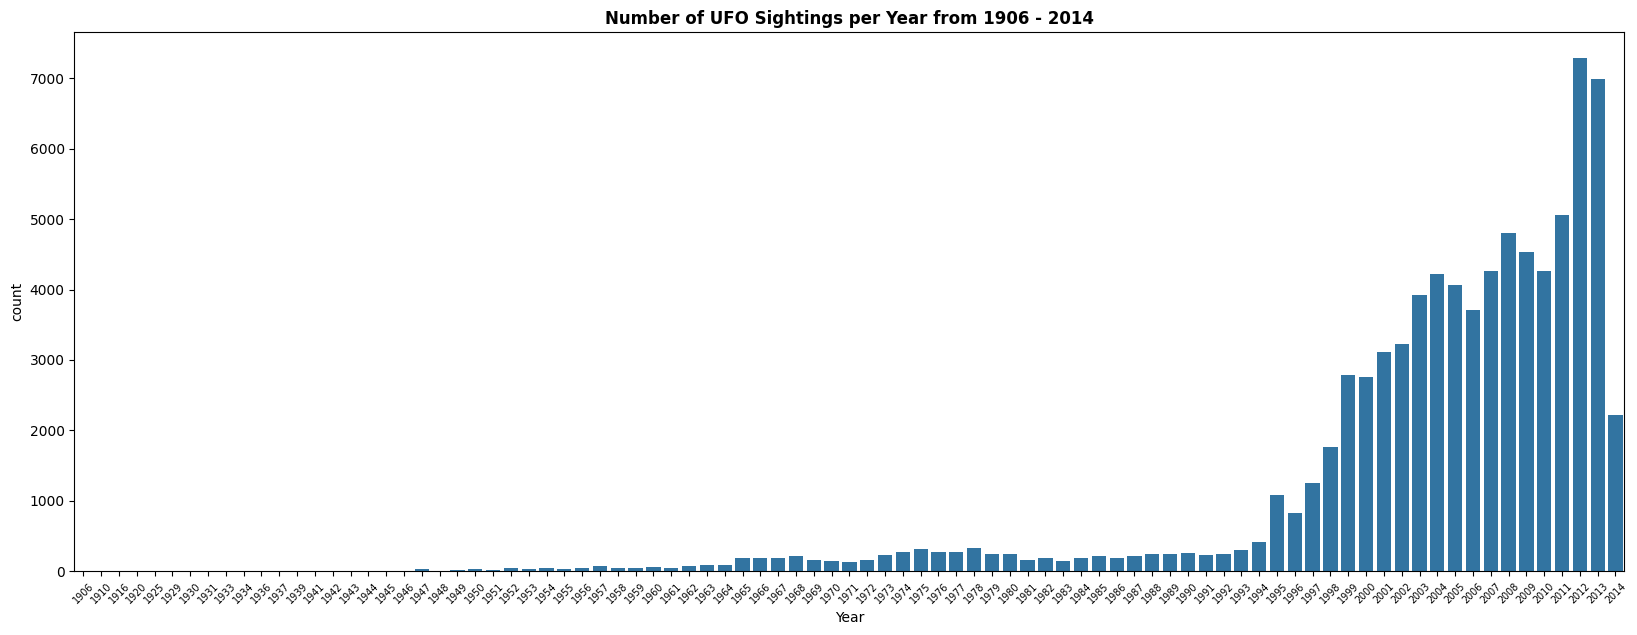

In [ ]:
# plot annual UFO sightings count
fig = plt.subplots(figsize=(20, 7))
plot = sns.countplot(data=merged_df2, x='Year', orient='v')
plot.set_xticks(ticks = plot.get_xticks(), labels = plot.get_xticklabels(), rotation=45, fontsize = 'x-small')
_ = plot.set_title('Number of UFO Sightings per Year from 1906 - 2014', fontdict = {'size': 12, 'weight':'bold'})

In [ ]:
# obtain summary statistics for annual UFO count
year_UFO_count = merged_df2.groupby('Year')['datetime'].count().reset_index(name='Total_UFO')
year_UFO_count['Total_UFO'].describe()

count      87.000000
mean      918.977011
std      1693.024712
min         1.000000
25%        24.000000
50%       183.000000
75%       327.000000
max      7287.000000
Name: Total_UFO, dtype: float64

As displayed in the count plot above and by the calculated summary statistics, the total annual UFO count is heavily skewed left. One could argue that as ways of reporting such as email, phone and the internet became more accessible, UFO sightings were more regularly documented; however the number of sightings reported does not consistently increase as technology became more readily available. Perhaps this is most notable in the drastic decline in reported UFO activity from 2013 to 2014; potentially suggesting that there could be less obvious factors impacting the number of reports each year, thus we will continue to investigate and explore the three factors mentioned in the introduction. Additionally, it may be in our best interest to apply a logarithmic transformation to the annual UFO count to obtain a more balanced distribution and use this variable instead of the raw data in our future analysis.   

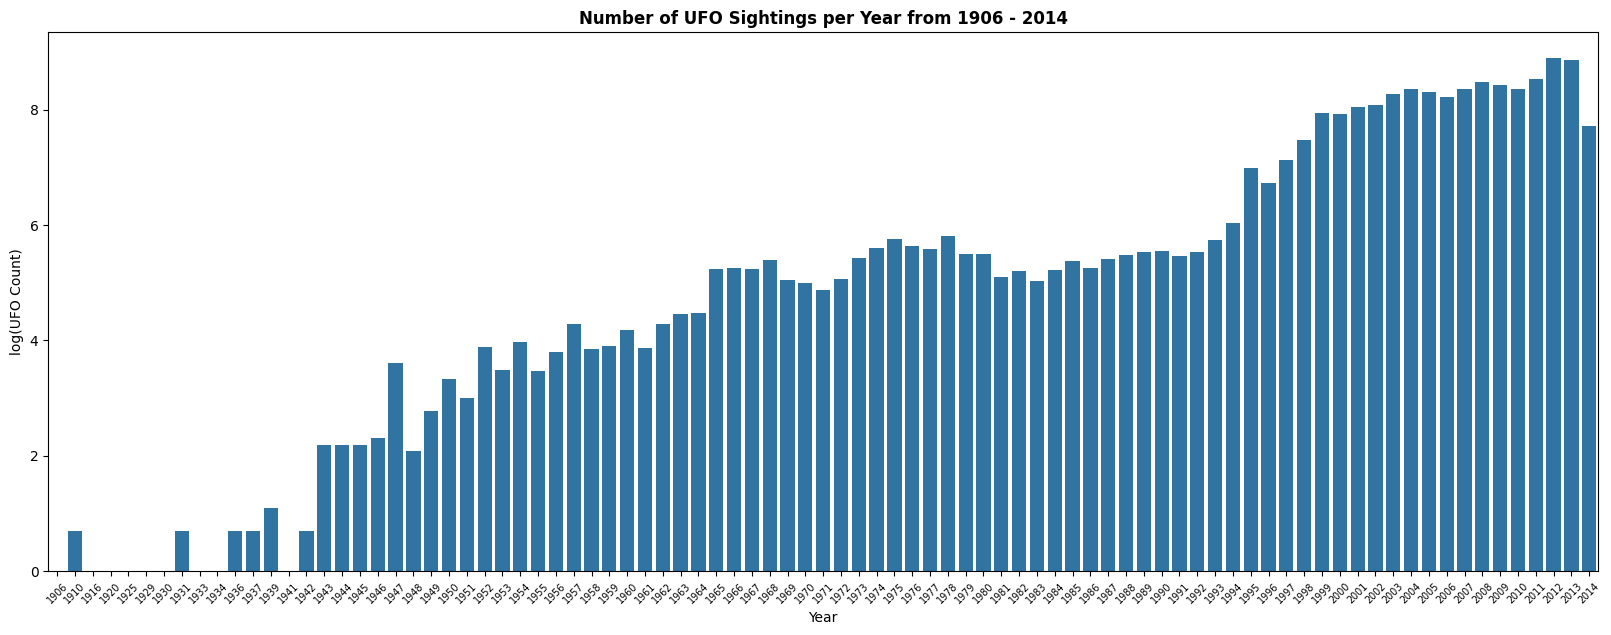

In [ ]:
# apply log transformation to total UFO count
year_UFO_count['Total_UFO_log'] = np.log(year_UFO_count['Total_UFO'])

# plot logarithmic annual UFO sightings count
fig = plt.subplots(figsize=(20, 7))
plot = sns.barplot(data=year_UFO_count, x='Year', y='Total_UFO_log', orient='v')
plot.set_ylabel('log(UFO Count)')
plot.set_xticks(ticks = plot.get_xticks(), labels = plot.get_xticklabels(), rotation=45, fontsize = 'x-small')
_ = plot.set_title('Number of UFO Sightings per Year from 1906 - 2014', fontdict = {'size': 12, 'weight':'bold'})

In [ ]:
# obtain summary statistics for log annual UFO count
year_UFO_count['Total_UFO_log'].describe()

count    87.000000
mean      4.633630
std       2.615746
min       0.000000
25%       3.163968
50%       5.209486
75%       5.789661
max       8.893847
Name: Total_UFO_log, dtype: float64

Upon applying a logarithmic transformation to the annual UFO count, we can see a more even distribution. Although the distribution still does not exhibit a normal curve, the mean and median are much closer in magnitude and the range of values decreased from 7286 to approximately 9.

In [ ]:
numerical_cols = ['UFO_Sightings_Count', 'AvgTemperature', 'longitude', 'latitude']
print(merged_df[numerical_cols].describe())

       UFO_Sightings_Count  AvgTemperature    longitude     latitude
count          4471.000000     4471.000000  4471.000000  4471.000000
mean              1.057034       58.825274   -86.216103    37.509140
std               0.297813       18.209581    46.690805    12.868536
min               1.000000      -99.000000  -157.939431   -37.812558
25%               1.000000       48.100000  -117.173746    35.595363
50%               1.000000       61.500000   -90.232657    39.522208
75%               1.000000       71.450000   -78.903032    43.162046
max               8.000000      101.600000   144.985689    64.145981


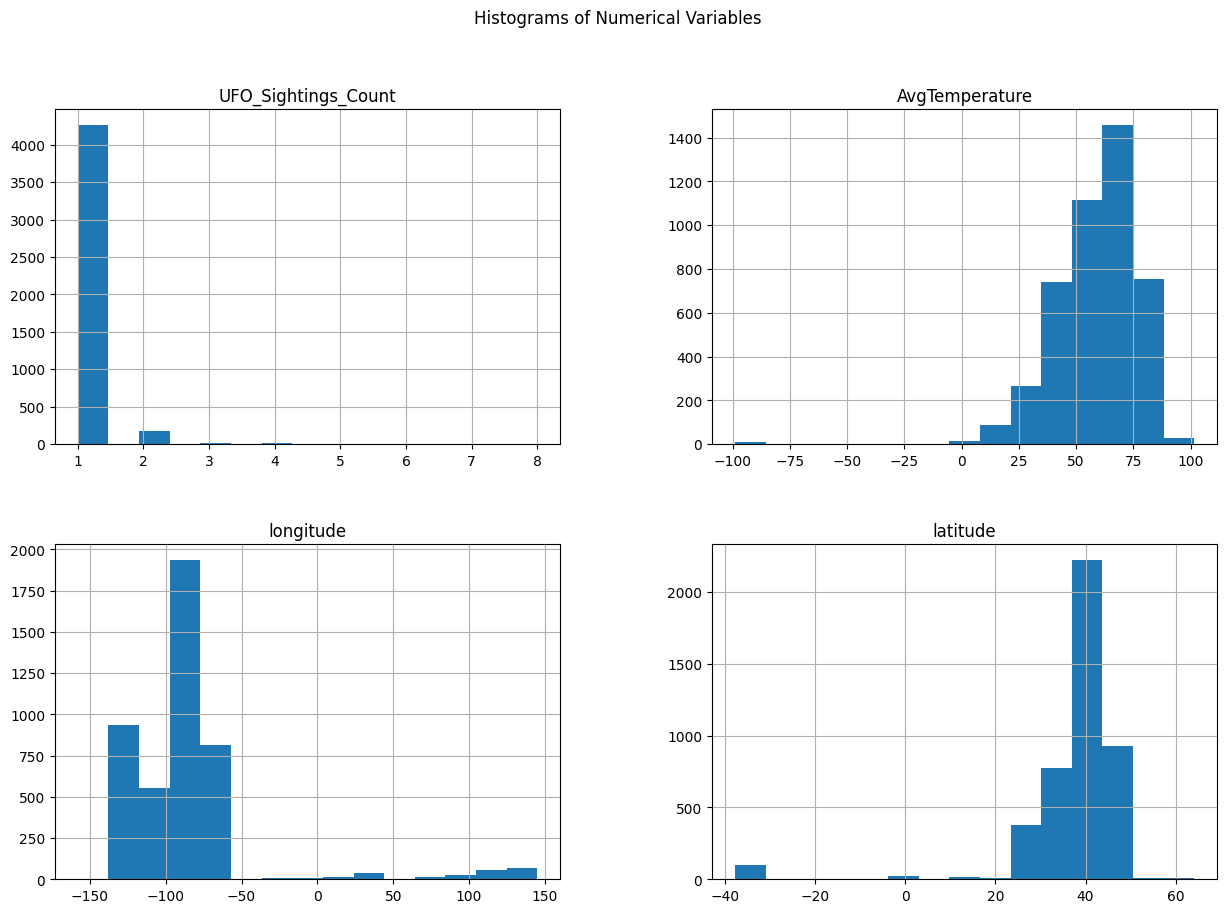

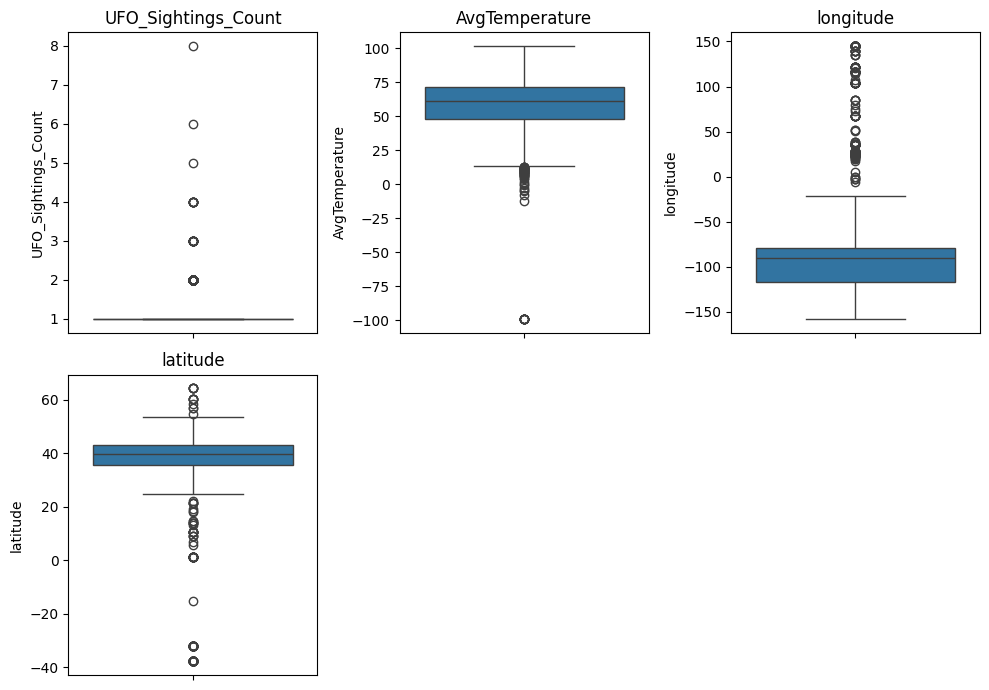

In [ ]:
# Histograms for numerical variables
merged_df[numerical_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

# Box plots for numerical variables
plt.figure(figsize=(10, 7))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=merged_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

UFO_Sightings_Count: This variable suggests most of the data points record only 1 sighting per day per location, with a mean close to 1 (1.057034) and a maximum value of 8, indicating a few instances with more sightings.


AvgTemperature: Temperatures in the dataset vary widely, ranging from a chilly -99 degrees to a scorching 101.6 degrees, with an average temperature of 58.8 degrees.


Longitude: The longitude values have a mean of approximately -86.2, with a broad spread from -157.9 to 144.9, indicating a wide geographical coverage.


Latitude: The latitude values center around 37.5, with a range from -37.8 to 64.1, suggesting a concentration of data points in the northern hemisphere.

In [ ]:
merged_df2['duration (seconds)'] = pd.to_numeric(merged_df2['duration (seconds)'], errors='coerce')

# Step 2: Handle missing values (example: fill with 0)
# Note: Choose a method that makes sense for your analysis. Filling with 0 might not be appropriate for all cases.
merged_df2['duration (seconds)'].fillna(0, inplace=True)

# Optional: if you want to remove rows with NaN instead, use:
# merged_df2 = merged_df2.dropna(subset=['duration (seconds)'])

# Step 3: Convert to integers
merged_df2['duration (seconds)'] = merged_df2['duration (seconds)'].astype(int)


# Descriptive statistics for numerical variables
numerical_cols2 = ['duration (seconds)', 'latitude', 'longitude', 'days_between', 'Total_Alien_Books', 'Total_Meteorites']
print(merged_df2[numerical_cols2].describe())

       duration (seconds)      latitude     longitude  days_between  \
count        7.995100e+04  79951.000000  79951.000000  79951.000000   
mean         9.048084e+03     38.127243    -86.829994   1171.980826   
std          6.216890e+05     10.437135     39.592189   3266.472525   
min          0.000000e+00    -82.862752   -176.658056      0.000000   
25%          3.000000e+01     34.133611   -112.073333      8.000000   
50%          1.800000e+02     39.407778    -87.906389     26.000000   
75%          6.000000e+02     42.787500    -78.781389    122.000000   
max          9.783600e+07     72.700000    178.441900  35105.000000   

       Total_Alien_Books  Total_Meteorites  
count       78887.000000      77726.000000  
mean           34.321320        877.201104  
std            32.251913        613.541187  
min             1.000000          9.000000  
25%            13.000000        329.000000  
50%            20.000000        936.000000  
75%            63.000000       1496.000000  


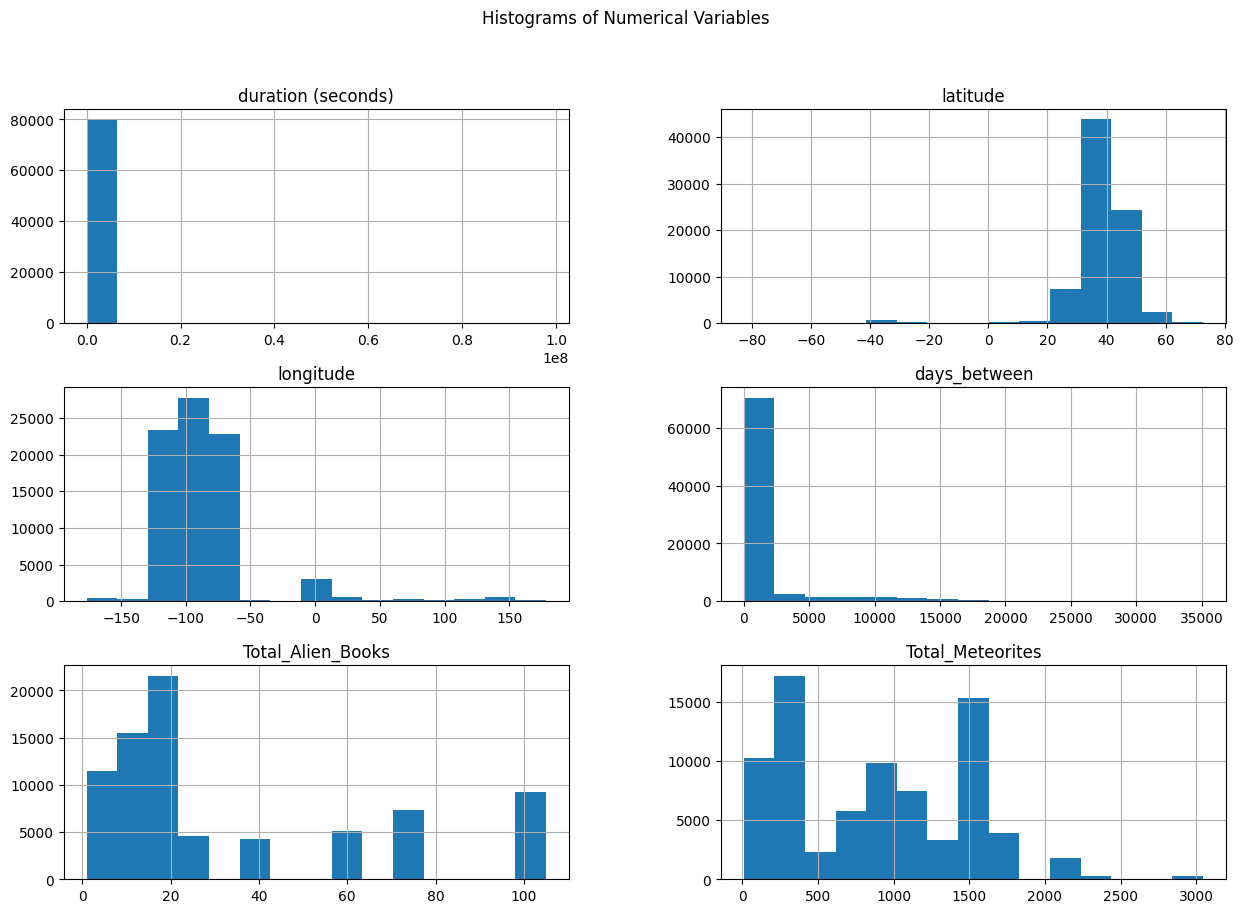

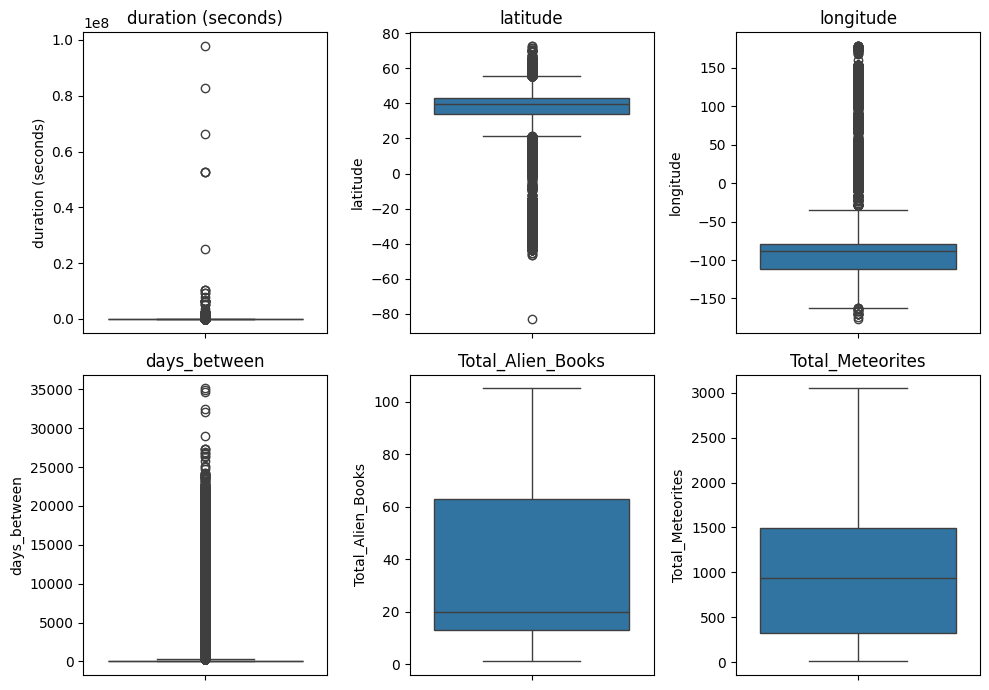

In [ ]:
# Histograms for numerical variables
merged_df2[numerical_cols2].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

# Box plots for numerical variables
plt.figure(figsize=(10, 7))
for i, col in enumerate(numerical_cols2):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=merged_df2[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Duration (seconds): The duration variable has a large range with a maximum value of approximately 98 million seconds, which greatly skews the mean to over 94,000 seconds, despite the median being only 180 seconds. This suggests a small number of extremely long-duration events are present in the data.


Latitude: The latitude variable is centered around 38.1, with a range from -82.9 to 72.7, indicating a concentration of data points between these latitudinal bounds.


Longitude: The longitude shows a mean of approximately -86.3, with values ranging widely from -176.7 to 178.4, suggesting a global spread of data points.


The mean latitiude and longitutde coordinates correspond to an address an address close to the boarder of Indiana and Kentucky, potentially suggesting that the majority of the UFO sightings have occurred in the US.


Days_Between: This variable, which likely represents the number of days between events, shows a maximum value of 35,105 days, with a median of 26 days, again indicating some extreme values that affect the overall distribution.


Total_Alien_Books: The average number of alien-related books released in a given year is 34.3, with a range from 1 to 105, and a median of 20, indicating a moderate spread in the data.


Total_Meteorites: The data for meteorite-related records show an average of 877.2, with a wide range from 9 to 3,046 and a median of 936, suggesting that the count of meteorite occurrences or related entries is quite variable.

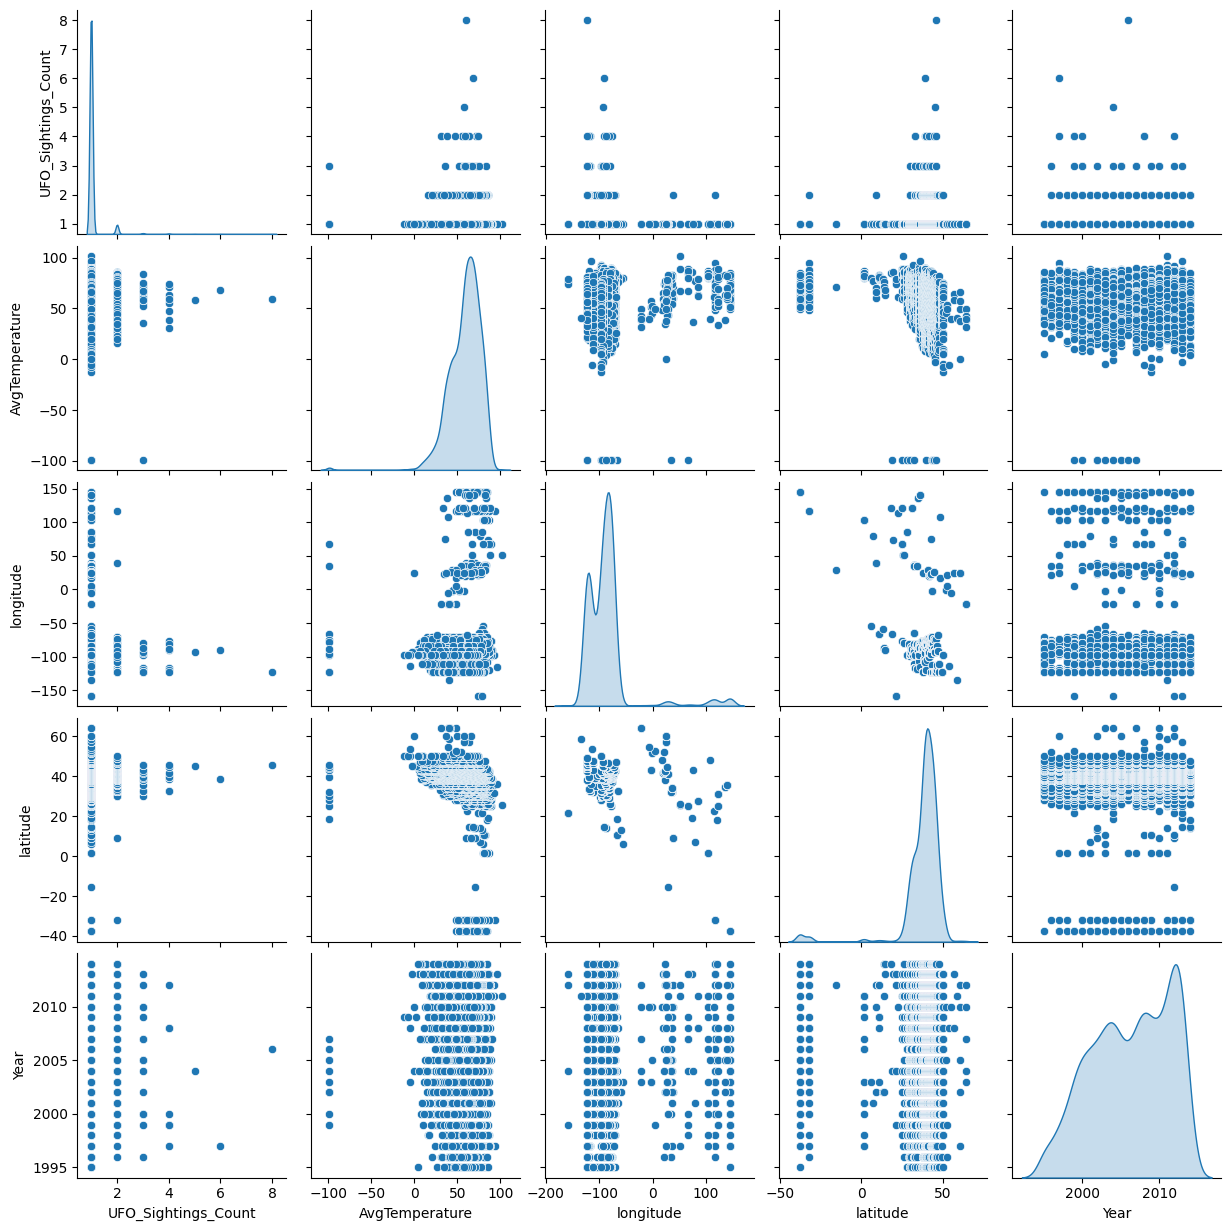

In [ ]:
# Selecting a subset of variables to plot
columns_to_plot = ['UFO_Sightings_Count', 'AvgTemperature', 'longitude', 'latitude', 'Year']
sns.pairplot(merged_df[columns_to_plot], diag_kind='kde')
plt.show()

From this pairplot, we see that very few numerical variables have a significant correlation with one another. However, the two scatterplots that represent the relationship between latitude & UFO_Sightings_Count and AvgTemperature & UFO_Sightings_Counts look very similar. This may provide insight into how both latitude and AvgTemperature impact UFO_Sigthings_Count similarly. Most likely because location on the globe highly impacts the average daily temperature of that city. 

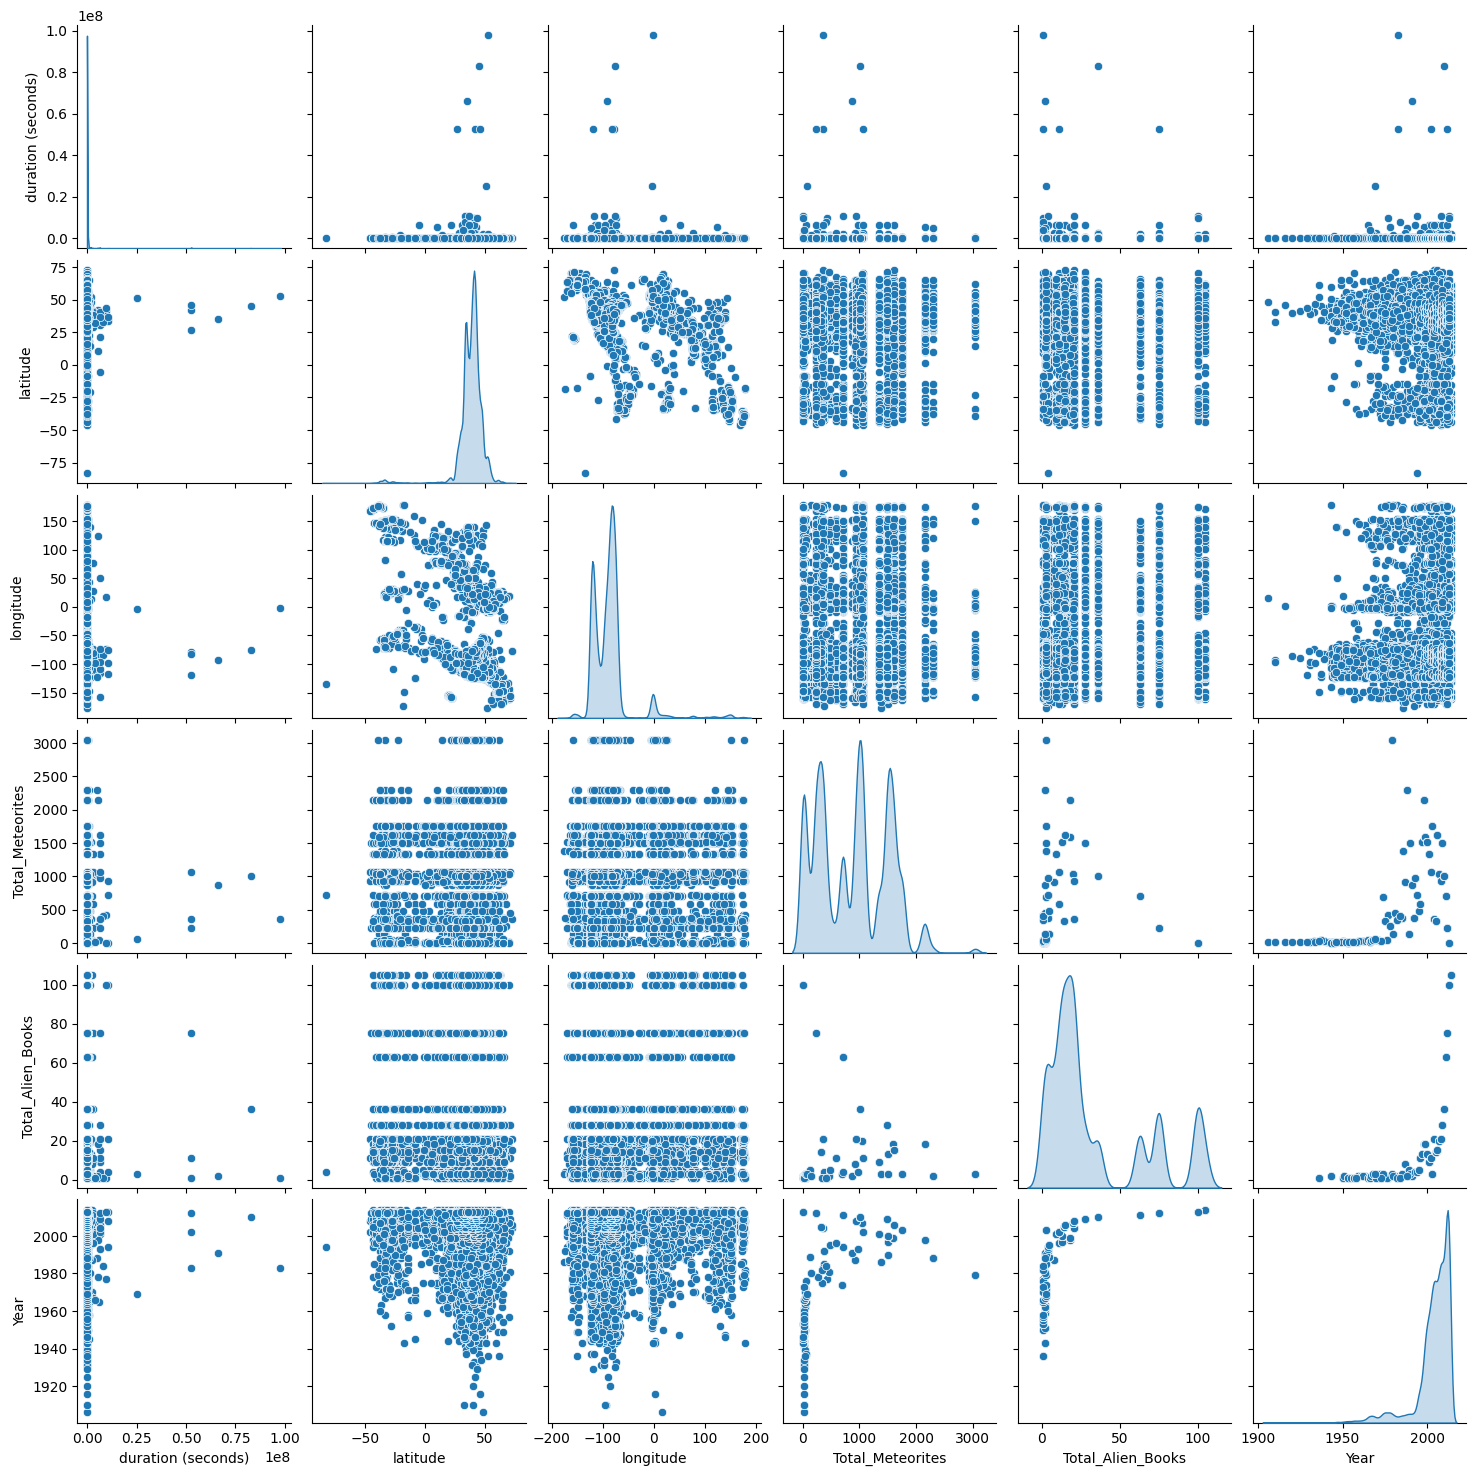

In [ ]:
# Selecting a subset of variables to plot
columns_to_plot = ['duration (seconds)', 'latitude', 'longitude', 'Total_Meteorites','Total_Alien_Books', 'Year']
sns.pairplot(merged_df2[columns_to_plot], diag_kind='kde')
plt.show()

The pairplot analysis highlights intriguing patterns that align with our research questions, revealing exponential relationships that could provide insights into the dynamics of UFO sightings. Notably, the plot between 'Year' and 'Total Alien Books Published' per year underscores an exponential growth in publications, suggesting a rising public interest or cultural emphasis on alien themes over time. This trend may reflect or influence societal perceptions and reporting of UFO sightings, hinting at the impact of cultural trends on the awareness and documentation of such phenomena. Similarly, the relationship between 'Year' and 'Total Meteorites per Year' exhibits an exponential trajectory, possibly indicating increased scientific capability to detect meteorites or a growing public interest in extraterrestrial matters. These patterns, evident from the pairplot, offer a quantitative basis to explore how time-related changes in cultural interests and scientific observations relate to the frequency and documentation of UFO sightings. 

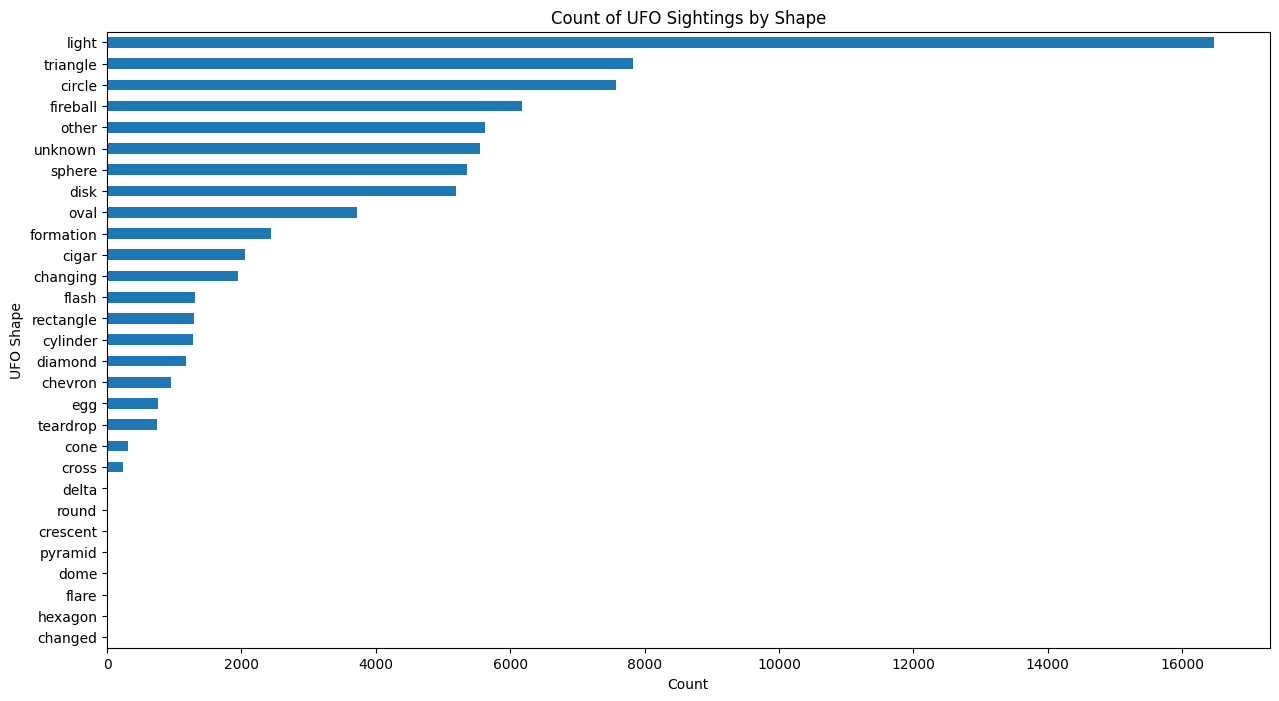

In [ ]:
# Select columns that start with "shape_"
shape_columns = [col for col in ufo_df.columns if col.startswith('shape_')]

# Sum the values in each shape column to get the count of each shape
shape_counts = ufo_df[shape_columns].sum()

# Convert the index to more readable shape names by removing 'shape_' prefix
shape_counts.index = [shape.replace('shape_', '') for shape in shape_counts.index]

# Create a bar plot
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
shape_counts.sort_values().plot(kind='barh')  # Sort values for better visualization
plt.title('Count of UFO Sightings by Shape')
plt.xlabel('Count')
plt.ylabel('UFO Shape')
plt.show()

The bar chart illustrates the frequency of UFO sightings classified by the shape of the observed phenomenon. The 'light' shape category leads by a substantial margin, indicating that most sightings are reported as undefined lights. Following 'light', the shapes 'triangle' and 'circle' are the next most frequently reported UFO shapes. These shape categories could reflect common patterns or popular conceptions of UFOs. Notably, the more specific or complex shapes like 'hexagon' and 'changed' are among the least reported, which may suggest that observers are less likely to ascribe detailed structures to UFOs or that such sightings are relatively rare. 

## Inferential Statistics 

### Simple OLS Linear Regression + Scatterplots

Linear Regression - Relationship Between UFO Sightings and Alien Books Released

Text(0.5, 0, 'Total Number of Alien Books Released in a Year')

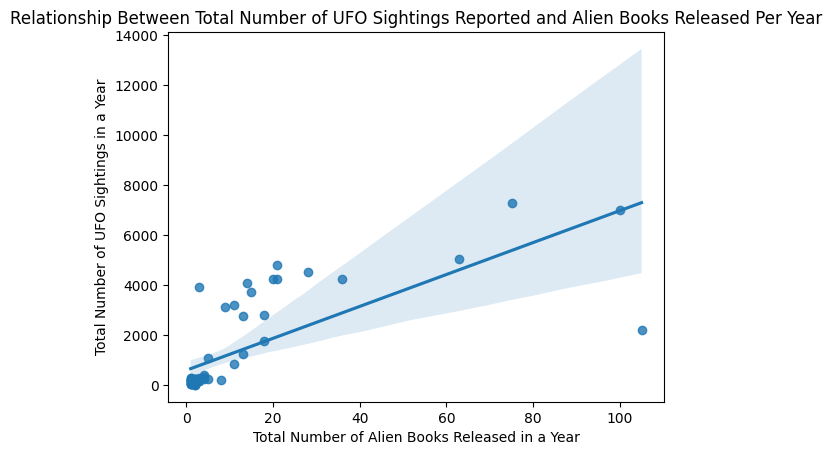

In [ ]:
# investigate the relationship between total number of UFO sightings reported and alien books released each year
year_count = merged_df2[merged_df2['Year'] >= 1941].groupby('Year')['datetime'].count().reset_index(name='Total_UFO')
book_sightings_df = year_count.merge(merged_df2[['Total_Alien_Books', 'Year']], on='Year', how='inner').drop_duplicates().dropna()
book_sightings_plt = sns.regplot(data=book_sightings_df, x='Total_Alien_Books', y= 'Total_UFO')
book_sightings_plt.set_title("Relationship Between Total Number of UFO Sightings Reported and Alien Books Released Per Year")
book_sightings_plt.set_ylabel("Total Number of UFO Sightings in a Year")
book_sightings_plt.set_xlabel("Total Number of Alien Books Released in a Year")

In [ ]:
# perform simple linear regression between total number of UFO sightings and total number of alien books each year
book_model = smf.ols(f'Total_UFO ~ Total_Alien_Books', data=book_sightings_df).fit()
book_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Total_UFO   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     65.29
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           5.06e-11
Time:                        18:44:40   Log-Likelihood:                -506.80
No. Observations:                  59   AIC:                             1018.
Df Residuals:                      57   BIC:                             1022.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           595.7235    195.231      3.051      0.003     204.780     986.667
Total_Alien_Books    63.8501      7.902      8.080      0.000      48.026      79.674
==============================================================================
Omnibus:                        9.491   Durbin-Watson:                   0.393
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               23.500
Skew:                           0.049   Prob(JB):                     7.89e-06
Kurtosis:                       6.090   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the regression plot above and the ordinary least squares results suggest that there is a positive correlation between the number of UFO sightings and the number of alien-related books released each year and according to the r-squared value, 53.4% of variation in the UFO sightings can be explained by this model. Additionally, the probability f-statistic is much less than 0.05, implying that this relationship is statistically significant.

Linear Regression - Relationship Between UFO Sightings and Meteorites

Text(0.5, 0, 'Total Number of Meteorites in a Year')

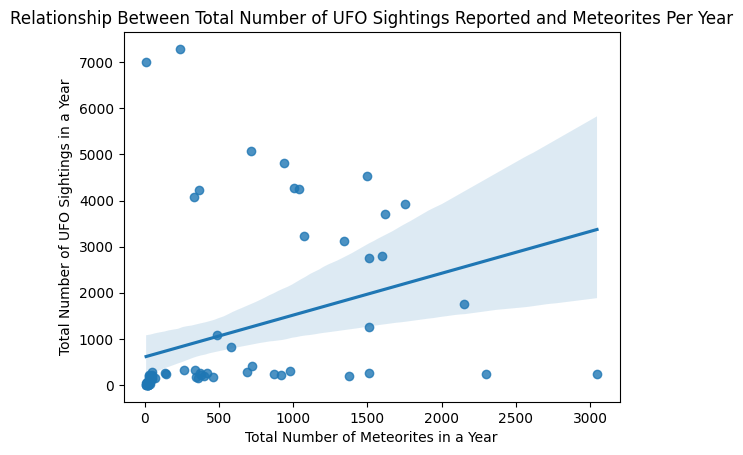

In [ ]:
# investigate the relationship between total number of UFO sightings reported and meteorites each year
meter_sightings_df = year_count.merge(merged_df2[['Total_Meteorites', 'Year']], on='Year', how='inner').drop_duplicates().dropna()
meter_sightings_plt = sns.regplot(data=meter_sightings_df, x='Total_Meteorites', y= 'Total_UFO')
meter_sightings_plt.set_title("Relationship Between Total Number of UFO Sightings Reported and Meteorites Per Year")
meter_sightings_plt.set_ylabel("Total Number of UFO Sightings in a Year")
meter_sightings_plt.set_xlabel("Total Number of Meteorites in a Year")

In [ ]:
# perform simple linear regression between total number of UFO sightings and total number of meteorites
meter_model = smf.ols(f'Total_UFO ~ Total_Meteorites', data=meter_sightings_df).fit()
meter_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Total_UFO   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     9.104
Date:                Tue, 19 Mar 2024   Prob (F-statistic):            0.00354
Time:                        18:44:40   Log-Likelihood:                -645.70
No. Observations:                  73   AIC:                             1295.
Df Residuals:                      71   BIC:                             1300.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          608.2487    250.181      2.431      0.018     109.402    1107.096
Total_Meteorites     0.9072      0.301      3.017      0.004       0.308       1.507
==============================================================================
Omnibus:                       42.689   Durbin-Watson:                   0.206
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.594
Skew:                           2.001   Prob(JB):                     4.33e-24
Kurtosis:                       7.399   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Upon analyzing the regression plot above and the ordinary least squares results, there appears to be a positive correlation between the number of UFO sightings and the number of meteorites recorded each year. Compared to the previous model, this OLS equation has a much smaller r-squared value (0.193), suggesting that a model which uses the number of meteorites recorded does not capture the variability in the number of UFO sightings as well as a model which uses alien-book count as its predictor variable. That being said, the probability f-statistic is still less than 0.05, implying that this relationship is also statistically significant.

## Graphical Analysis

Heatmaps - Distribution of UFO Reports Over the Months

Following the meteorologist argument for UFO sightings, we may be interested in investigating what impact weather conditions have on the number of UFO sightings reported. Prior to joining international weather data to our current analysis, we want to first determine if we can identify an inherent pattern in the number of UFO sightings reported over the span of a year as a result of the natural change in seasons. In order to visualize this relationship, we can group the records of UFO sightings in our final merged DataFrame by year and then obtain the proportion of UFO sightings that occurred each month through normalization. Applying this process to a span of years and representing these calculations via a heat map allows us to easily detect a pattern (or a lack-there-of) between the number of UFO reports across the months and help us decide if considering weather conditions is worth our time.

In [ ]:
def produce_heatmap(df, tag=''):
    '''
    Produce a heatmap and pivot table to represent the proportion of UFO sightings reported each month
    out of the total number of UFO sightings that year over the span of multiple years.
    '''
    df['Month_Name'] = pd.to_datetime(df['datetime']).apply(lambda x:x.strftime('%B'))
    df = df.groupby('Year')["Month_Name"].value_counts(normalize=True).reset_index(name='proportions')
    pivot_proportions = df.pivot_table(index='Month_Name', columns='Year', values='proportions').fillna(0)
    months_ordered = ["January", "February", "March", "April", "May", "June", 
                  "July", "August", "September", "October", "November", "December"]
    pivot_proportions = pivot_proportions.reindex(months_ordered)
    ax = plt.axes()
    sns.heatmap(pivot_proportions, cmap="Blues", vmax=0.2, vmin=0, annot=True,
                fmt=".2f", annot_kws={"size": 6}, ax=ax)
    ax.set_title(f'Proportion of UFO Reports Per Month During Each Year From 1998 - 2013{tag}', fontdict = {'size': 12, 'weight':'bold'})
    plt.show()
    return pivot_proportions


/tmp/ipykernel_272/3598560114.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month_Name'] = pd.to_datetime(df['datetime']).apply(lambda x:x.strftime('%B'))


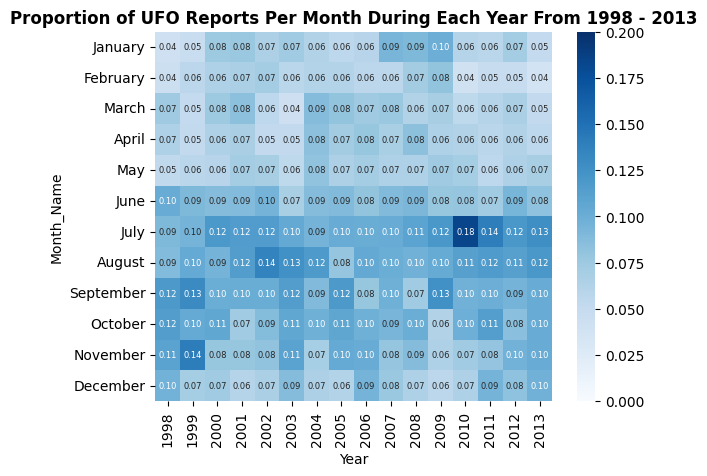

Year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Month_Name,,,,,,,,,,,,,,,,
January,0.042022,0.047653,0.075335,0.077022,0.065818,0.073065,0.062692,0.056047,0.059758,0.093471,0.090474,0.099978,0.060755,0.058463,0.071772,0.051179
February,0.044293,0.056969,0.064469,0.066752,0.071717,0.058299,0.062456,0.062193,0.056258,0.056599,0.071963,0.080998,0.039643,0.048588,0.048168,0.037598
March,0.074390,0.051236,0.075697,0.084082,0.055573,0.043024,0.086823,0.080629,0.074293,0.077266,0.062604,0.068859,0.055125,0.060636,0.066557,0.052895
April,0.065304,0.051594,0.064832,0.067394,0.053089,0.051680,0.083984,0.072271,0.078331,0.068107,0.084027,0.064886,0.063101,0.058068,0.063126,0.055611
May,0.053379,0.058044,0.059761,0.071566,0.069233,0.055244,0.081855,0.066372,0.071602,0.065054,0.065100,0.074597,0.071077,0.055698,0.064498,0.069478
June,0.101647,0.090290,0.087287,0.088896,0.095312,0.068483,0.087296,0.089479,0.080754,0.089713,0.091930,0.078349,0.079287,0.072684,0.094415,0.082773
July,0.090290,0.095306,0.119160,0.116175,0.116113,0.104379,0.094630,0.102262,0.100942,0.101926,0.109609,0.119841,0.184143,0.140036,0.120214,0.127234
August,0.088586,0.103547,0.094893,0.115212,0.135983,0.125764,0.117341,0.079154,0.104441,0.100047,0.097130,0.102406,0.112128,0.117124,0.112392,0.120229
September,0.118115,0.129703,0.100326,0.101091,0.100900,0.115326,0.089189,0.117994,0.078331,0.097698,0.074043,0.125579,0.097115,0.099743,0.094689,0.101644


In [ ]:
# truncate the data to only look at the UFO reports between 1998 and 2013
merged_df2_trunc = merged_df2[(merged_df2["Year"] >= 1998) & (merged_df2["Year"] < 2014)]
produce_heatmap(merged_df2_trunc)

In the heat plot displayed above, we chose to look at years between 1998 and 2013 because this selection of years had the greatest number of UFO sightings to consider (as determined by our count plot earlier). From this plot, we can glean that July, August and September seem to be the most common months for UFO sightings. Seasonally, these months are considered mid to late-summer or early-autumn here in the US, but it is important to remember that our DataFrame includes international UFO reports, thus it may be in our best interest to split our dataset into two groups based on latitude. Since countries in the Southern hemisphere have opposite seasons compared to the Northern hemisphere, it seems more accurate to consider these records separately when considering if UFO report trends have a relationship with weather conditions.

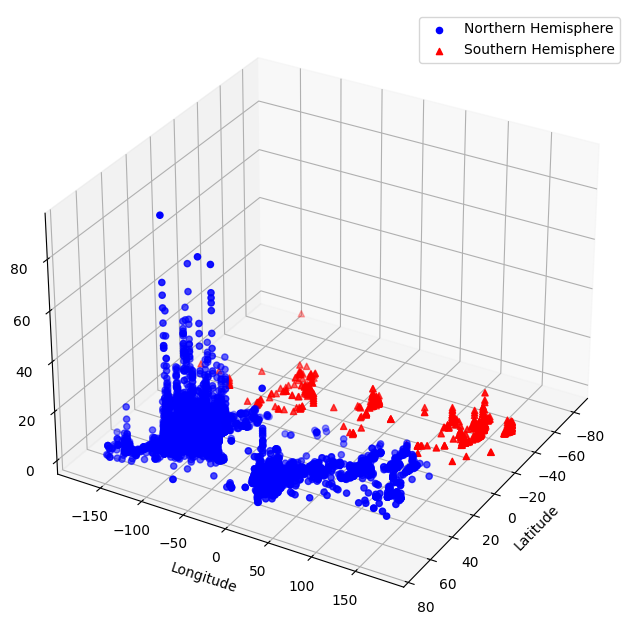

In [ ]:
# Convert 'datetime' to datetime type (if necessary)
ufo_df['datetime'] = pd.to_datetime(ufo_df['datetime'])

# Ensure 'latitude' and 'longitude' are of a float type
ufo_df['latitude'] = ufo_df['latitude'].astype(float)
ufo_df['longitude'] = ufo_df['longitude'].astype(float)

# Round latitude for grouping
ufo_df['lat_rounded'] = ufo_df['latitude'].round(1)
ufo_df['lon_rounded'] = ufo_df['longitude'].round(1)

# Group by rounded latitude, longitude, and month, then count sightings
monthly_avg_sightings = ufo_df.groupby(['lat_rounded', 'lon_rounded', ufo_df['datetime'].dt.month]).size().reset_index(name='AvgMonthlyCount')

# Assign hemisphere
monthly_avg_sightings['Hemisphere'] = np.where(monthly_avg_sightings['lat_rounded'] > 0, "Northern", "Southern")

# Plotting
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Separate data by hemisphere for coloring
northern_hemisphere = monthly_avg_sightings[monthly_avg_sightings['Hemisphere'] == 'Northern']
southern_hemisphere = monthly_avg_sightings[monthly_avg_sightings['Hemisphere'] == 'Southern']

# Plot each hemisphere in different colors
ax.scatter(northern_hemisphere['lat_rounded'], northern_hemisphere['lon_rounded'], northern_hemisphere['AvgMonthlyCount'], c='b', marker='o', label='Northern Hemisphere')
ax.scatter(southern_hemisphere['lat_rounded'], southern_hemisphere['lon_rounded'], southern_hemisphere['AvgMonthlyCount'], c='r', marker='^', label='Southern Hemisphere')

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Average Monthly UFO Count',  labelpad=5)
ax.legend()

ax.view_init(elev=30, azim=30)

plt.show()

This 3D scatter plot distinguishes between UFO sightings in the Northern and Southern Hemispheres, showcasing both spatial distribution and frequency. Sightings in the Northern Hemisphere, marked in blue, are significantly more numerous and show greater variation in average monthly counts compared to the Southern Hemisphere, depicted in red. The spread of points suggests a higher concentration of UFO sightings at certain longitudes, and possibly latitudes, in the Northern Hemisphere. The visual disparity between the hemispheres may indicate a reporting bias, population density differences, or other socio-geographic factors influencing the number of reported sightings.

In [ ]:
# add a hemisphere column to dataframe that distringuishes between northern and southern hemisphere locations
merged_df2['Hemisphere'] = np.where(merged_df2['latitude'] > 0, "Northern", "Southern")

In [ ]:
# compare the distribution of UFO sightings per month between Northern and Southern hemispheres to understand if the
# variation in pattern might be weather related
merged_df2_trunc_north = merged_df2[(merged_df2["Year"] >= 1998) & (merged_df2["Year"] < 2014) & (merged_df2["Hemisphere"] == "Northern")]
merged_df2_trunc_south = merged_df2[(merged_df2["Year"] >= 1998) & (merged_df2["Year"] < 2014) & (merged_df2["Hemisphere"] == "Southern")]

/tmp/ipykernel_272/3598560114.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month_Name'] = pd.to_datetime(df['datetime']).apply(lambda x:x.strftime('%B'))


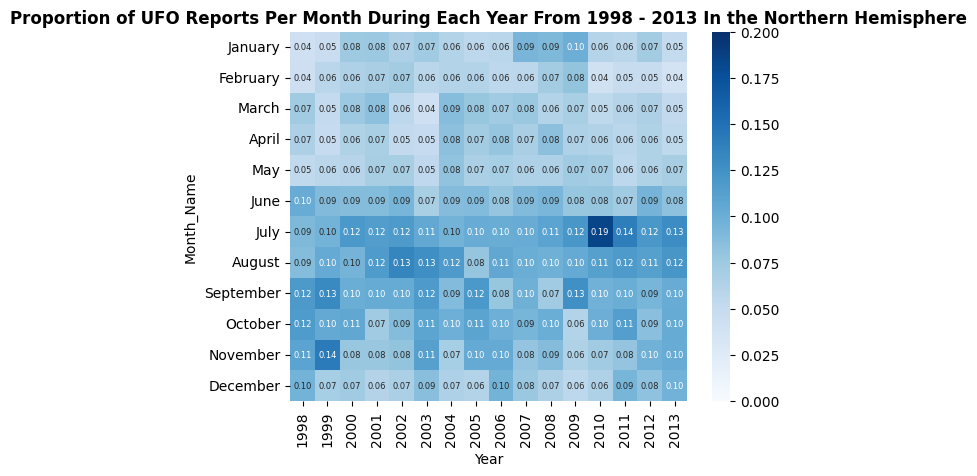

Year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Month_Name,,,,,,,,,,,,,,,,
January,0.042002,0.046461,0.075285,0.076066,0.065693,0.072974,0.062139,0.055556,0.058210,0.093090,0.089954,0.099933,0.060520,0.057421,0.072021,0.050801
February,0.043153,0.057350,0.064635,0.067541,0.072041,0.057858,0.062380,0.062312,0.056013,0.056756,0.071879,0.081196,0.039480,0.048679,0.047830,0.037235
March,0.073648,0.051543,0.076386,0.083607,0.055855,0.041699,0.086705,0.078579,0.073311,0.076941,0.062421,0.068704,0.054846,0.060600,0.066077,0.052100
April,0.066168,0.050454,0.063900,0.068197,0.052364,0.050560,0.084297,0.072322,0.079077,0.067917,0.083859,0.065135,0.062648,0.058017,0.063312,0.054986
May,0.053510,0.057713,0.059860,0.069508,0.069502,0.054209,0.081407,0.067067,0.070291,0.064830,0.064313,0.074058,0.071395,0.055633,0.063865,0.069274
June,0.101841,0.089292,0.087404,0.087541,0.094256,0.068022,0.086946,0.088839,0.079627,0.089290,0.092266,0.078519,0.079433,0.072720,0.094553,0.082840
July,0.090334,0.095463,0.118986,0.115082,0.117423,0.105291,0.095376,0.102102,0.101318,0.101639,0.109500,0.120455,0.185106,0.140274,0.120127,0.128157
August,0.088032,0.103811,0.095116,0.117049,0.134878,0.126922,0.117534,0.079329,0.105711,0.100451,0.097940,0.103279,0.112530,0.117425,0.112801,0.121374
September,0.118527,0.130672,0.100624,0.102951,0.102507,0.117279,0.088873,0.118869,0.078803,0.098076,0.073770,0.126255,0.097636,0.100139,0.094415,0.101746


In [ ]:
produce_heatmap(merged_df2_trunc_north, tag=' In the Northern Hemisphere')

/tmp/ipykernel_272/3598560114.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month_Name'] = pd.to_datetime(df['datetime']).apply(lambda x:x.strftime('%B'))


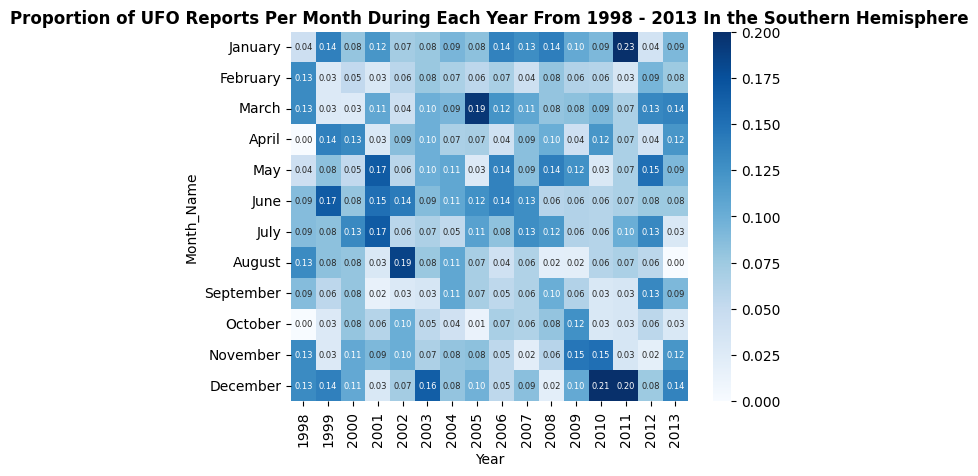

Year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Month_Name,,,,,,,,,,,,,,,,
January,0.043478,0.138889,0.078947,0.121212,0.071429,0.076923,0.093333,0.083333,0.136986,0.127660,0.14,0.104167,0.090909,0.233333,0.037736,0.090909
February,0.130435,0.027778,0.052632,0.030303,0.057143,0.076923,0.066667,0.055556,0.068493,0.042553,0.08,0.062500,0.060606,0.033333,0.094340,0.075758
March,0.130435,0.027778,0.026316,0.106061,0.042857,0.098901,0.093333,0.194444,0.123288,0.106383,0.08,0.083333,0.090909,0.066667,0.132075,0.136364
April,0.000000,0.138889,0.131579,0.030303,0.085714,0.098901,0.066667,0.069444,0.041096,0.085106,0.10,0.041667,0.121212,0.066667,0.037736,0.121212
May,0.043478,0.083333,0.052632,0.166667,0.057143,0.098901,0.106667,0.027778,0.136986,0.085106,0.14,0.125000,0.030303,0.066667,0.150943,0.090909
June,0.086957,0.166667,0.078947,0.151515,0.142857,0.087912,0.106667,0.125000,0.136986,0.127660,0.06,0.062500,0.060606,0.066667,0.075472,0.075758
July,0.086957,0.083333,0.131579,0.166667,0.057143,0.065934,0.053333,0.111111,0.082192,0.127660,0.12,0.062500,0.060606,0.100000,0.132075,0.030303
August,0.130435,0.083333,0.078947,0.030303,0.185714,0.076923,0.106667,0.069444,0.041096,0.063830,0.02,0.020833,0.060606,0.066667,0.056604,0.000000
September,0.086957,0.055556,0.078947,0.015152,0.028571,0.032967,0.106667,0.069444,0.054795,0.063830,0.10,0.062500,0.030303,0.033333,0.132075,0.090909


In [ ]:
produce_heatmap(merged_df2_trunc_south, tag=' In the Southern Hemisphere')

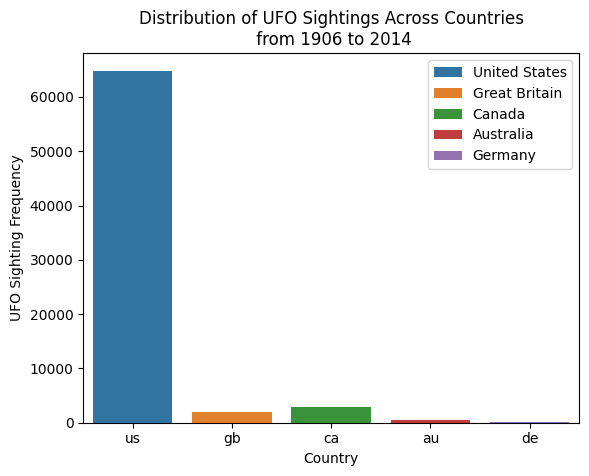

In [ ]:
fig = sns.countplot(data=merged_df2, x='country', hue='country')
fig.set_title('Distribution of UFO Sightings Across Countries\n from 1906 to 2014')
fig.set_ylabel('UFO Sighting Frequency')
fig.set_xlabel('Country')
fig.legend(labels=['United States', 'Great Britain', 'Canada', 'Australia', 'Germany'])

According to our data, the United States recorded 64,828 UFO sightings between 1906 and 2014, a number that exceeds its predecessor, Canada, by over 60,000. Given this fact, we aim to understand the distribution of UFO sighting reports among the US states. Which states contributed the most to 64,828 sightings? Which states contributed the least? Does there appear to be a relationship between geographical region and the number of UFO sightings reported? In order to explore these questions, we will create a geoplot.

Geoplot - Total UFO Sightings Per State

In [ ]:
ufo_state_df = merged_df2[(merged_df2.country == 'us') & (merged_df2.state != 'dc') & (merged_df2.state != 'pr')]['state'].value_counts().reset_index(name='ufo_state')

In [ ]:
ufo_state_df['state'] = ufo_state_df.state.str.upper()
ufo_state_df

,state,ufo_state
0,CA,8875
1,WA,3945
2,FL,3817
3,TX,3435
4,NY,2969
5,IL,2492
6,AZ,2408
7,PA,2356
8,OH,2261
9,MI,1828


In [ ]:
fig = px.choropleth(ufo_state_df, locations='state', locationmode="USA-states", color='ufo_state', 
                    scope='usa', labels={'ufo_state': 'UFO Count'}, title = 'Number of UFO Sightings Per State (Hover for Details)')
fig.show()

Based on the information visually represented by the geoplot above, it is apparent that California reported the greatest number of UFOs between the years of 1906 and 2014, followed by Washington, Florida, Texas, and New York while North Dakota, Delaware and Wyoming appear to have reported the fewest number of UFO sightings. It is worth noting that these values are not per capita (i.e. they do not consider the size of each state's population) however, this knowledge can still be wielded to inform and improve our analysis. The top five states do not appear to have a strong geographical correlation apart from the fact that they are all near a coastline. This fact could leads to reject the idea that a certain spot or general region of America is most frequently targeted by aliens and encourage us to pursue other commonly factors. Some features we might like to consider, such as use of hallucinogens among a population, are not available for every location or year in full our dataset. By sub selecting the states in which UFO reports are historically great or low and investigating trends and patterns over the years and among these selected states could potentially lead to nuanced results that could be further generalized to further our understanding and ultimately improve our prediction model.

## Comparative Analysis

### Astronomer Perspective: Meteorites vs UFO Sightings

Overall, 90 percent of UFO sightings can be attributed to astronomical and meteorological phenomena such as bright planets, stars, meteors, auroras, ion clouds or common objects such as balloons, bird and searchlights. The comprehensive data set from The Meteoritical Society contains information on all of the known meteorite landings, which we have aggregated into the total number of meteorite landings per year in order to  compare the number of meteorite landings with the number of UFO sightings per year. We will investigate the following relationship below, with the null hypothesis being there is not a statistically significant difference between the count of UFO sightings during the years of low meteorite activity and those years with high meteorite activity and the alternative hypothesis that there is a statistically significant difference between the frequency of UFO sightings during the types. 
 

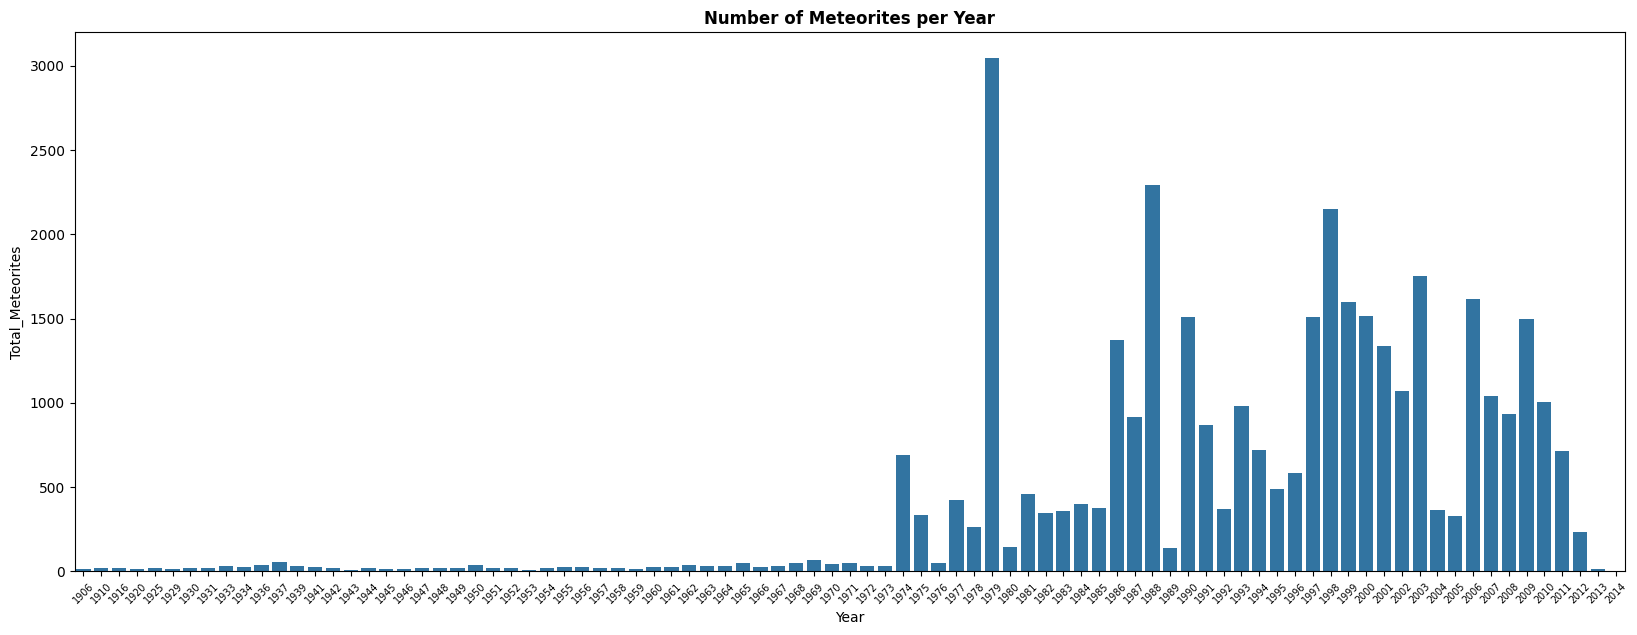

In [ ]:
# plot the distribution of meteorite landings per year
fig = plt.subplots(figsize=(20, 7))
plot = sns.barplot(x='Year', y='Total_Meteorites', data=merged_df2)
plot.set_xticks(ticks = plot.get_xticks(), labels = plot.get_xticklabels(), rotation=45, fontsize = 'x-small')
_ = plot.set_title('Number of Meteorites per Year', fontdict = {'size': 12, 'weight':'bold'})

Upon plotting the total number of meteorite landings from 1906 to 2014, we can identify a distinct year in which the trend in meteorite activity dramatically changed: 1973. Upon further investigation, there does not appear to be a prominent event or initiative put in place to explain this sudden jump thus we have chosen to split our dataset here and compare the distribution of UFO sightings before and after 1973. 

In [ ]:
# create new dataframe with annual UFO and meteorite counts
year_count = merged_df2.groupby('Year')['datetime'].count().reset_index()
year_count.rename(columns={'datetime': 'UFO_count'}, inplace=True)
meteor_merge_df = year_count.merge(merged_df2, how='inner', on='Year')
meteor_merge_df.dropna(subset='Total_Meteorites')

,Year,UFO_count,datetime,city,state,country,duration (seconds),duration (hours/min),comments,date posted,...,days_between,Day,Month,Day_Night,lat_rounded,lon_rounded,Year_published,Total_Alien_Books,Total_Meteorites,Hemisphere
0,1906,1,1906-11-12 00:00:00,wien (austria),NaN,NaN,10800,3 h,The oldest professional photo of a UFO object ...,2002-12-23,...,35105,12,11,Unknown,48.2,16.4,NaN,NaN,13.0,Northern
1,1910,2,1910-01-02 00:00:00,kirksville (near),mo,us,120,minutes,Historical sighting (1903 - 1913) Northern Mis...,2005-09-15,...,34955,2,1,Unknown,40.2,-92.6,NaN,NaN,20.0,Northern
2,1910,2,1910-06-01 15:00:00,wills point,tx,us,120,2 minutes,Cigar shaped object moving from West to East,2005-04-16,...,34652,1,6,Unknown,32.7,-96.0,NaN,NaN,20.0,Northern
3,1916,1,1916-04-05 13:00:00,france (above; from aircraft),NaN,NaN,60,about 1 min.,((NUFORC Note: Possible hoax. PD)) Saw 3 ci...,2004-03-09,...,32114,5,4,Unknown,46.2,2.2,NaN,NaN,19.0,Northern
4,1920,1,1920-06-11 21:00:00,cicero,in,us,60,1 minute,((NUFORC Note: Probable hoax. Note date. PD...,2009-05-12,...,32476,11,6,Unknown,40.1,-86.0,NaN,NaN,14.0,Northern
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77721,2013,6995,2013-09-09 21:15:00,nashville,tn,us,600,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,...,20,9,9,Unknown,36.2,-86.8,2013.0,100.0,11.0,Northern
77722,2013,6995,2013-09-09 22:00:00,boise,id,us,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,...,20,9,9,Unknown,43.6,-116.2,2013.0,100.0,11.0,Northern
77723,2013,6995,2013-09-09 22:00:00,napa,ca,us,1200,hour,Napa UFO&#44,2013-09-30,...,20,9,9,Unknown,38.3,-122.3,2013.0,100.0,11.0,Northern
77724,2013,6995,2013-09-09 22:20:00,vienna,va,us,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,...,20,9,9,Unknown,38.9,-77.3,2013.0,100.0,11.0,Northern


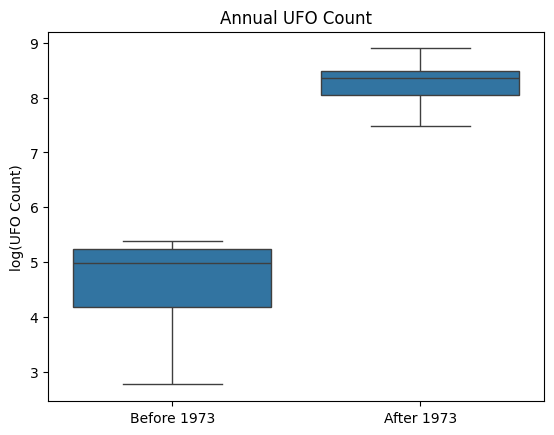

In [ ]:
# plot the distribution of the two groups
meteor_merge_df['UFO_count_log'] = np.log(meteor_merge_df['UFO_count'])
meteor_merge_df['Meteorite_class'] = (meteor_merge_df.Year >= 1973)
fig = sns.boxplot(x='Meteorite_class', y='UFO_count_log', data=meteor_merge_df, showfliers=False)
fig.set(title='Annual UFO Count')
fig.set_xlabel('')
fig.set_ylabel('log(UFO Count)')
_ = fig.set_xticks(ticks=[0,1], labels=['Before 1973', 'After 1973'])

In [ ]:
meteor_merge_df_sub = meteor_merge_df[['Year', 'UFO_count_log', 'Total_Meteorites', 'Meteorite_class']].drop_duplicates()
model = smf.ols('UFO_count_log ~ Meteorite_class', data=meteor_merge_df_sub).fit()
table = sm.stats.anova_lm(model, typ=2) 
table

,sum_sq,df,F,PR(>F)
Meteorite_class,350.160920,1.0,124.920025,2.282153e-18
Residual,238.261865,85.0,NaN,NaN


Upon running an ANOVA, we can see that the probability F-statistic is much less than the standard alpha level of 0.05, thus we have evident to reject our null hypothesis in favor of our alternative. In other words, we have reasonable evidence to believe that there is a statistically significant difference between the count of UFO sightings during the years of low meteorite activity and those years with high meteorite activity. That being said, partitioning on the data based on year might not lead to a very informative outcome since there are many confounding variables such as public awareness, resources and technology, all of which have grown overtime. 

We will now proceed to partition the data into different groups, unrelated to year, in order to further explore the connection between total meteorite count and UFO count per year and hopefully gain a more nuanced understanding of this relationship.

In [ ]:
# look at the distribution of total meteorite landings per year
meteor_merge_df_sub['Total_Meteorites'].describe()

count      86.000000
mean      430.523256
std       638.101481
min         9.000000
25%        20.500000
50%        48.500000
75%       664.000000
max      3046.000000
Name: Total_Meteorites, dtype: float64

Perhaps a better alternative would be to subset the years in the dataset based on their meteorite count relative to the quartiles. In order to do so, we will apply a logarithmic transformation to the total meteorite count to even out the distribution and then classify the years as follows:          

- 0-25% - low

- 25-50% - med-low

- 50-75% - med-high

- 75-100% - high

In [ ]:
# transform the data
meteor_merge_df_sub['Total_Meteorites_log'] = np.log(meteor_merge_df_sub['Total_Meteorites'])
# look at the distribution of total meteorite landings per year
meteor_merge_df_sub['Total_Meteorites_log'].describe()

count    86.000000
mean      4.675648
std       1.812941
min       2.197225
25%       3.019560
50%       3.881511
75%       6.495652
max       8.021585
Name: Total_Meteorites_log, dtype: float64

In [ ]:
# classify year based by log of total meteorites quartiles
meteor_merge_df_sub.loc[meteor_merge_df_sub['Total_Meteorites_log'] 
                        <= meteor_merge_df_sub['Total_Meteorites_log'].quantile(.25), 
                        'Meteorite_Year_Class_log'] = 'Low'
meteor_merge_df_sub.loc[(meteor_merge_df_sub['Total_Meteorites_log'] 
                        > meteor_merge_df_sub['Total_Meteorites_log'].quantile(.25)) 
                        & (meteor_merge_df_sub['Total_Meteorites_log'] 
                        <= meteor_merge_df_sub['Total_Meteorites_log'].quantile(.50)), 
                        'Meteorite_Year_Class_log'] = 'Med-Low'
meteor_merge_df_sub.loc[(meteor_merge_df_sub['Total_Meteorites_log'] 
                        > meteor_merge_df_sub['Total_Meteorites_log'].quantile(.50)) 
                        & (meteor_merge_df_sub['Total_Meteorites_log'] 
                        <= meteor_merge_df_sub['Total_Meteorites_log'].quantile(.75)), 
                        'Meteorite_Year_Class_log'] = 'Med-High'
meteor_merge_df_sub.loc[meteor_merge_df_sub['Total_Meteorites_log'] 
                        > meteor_merge_df_sub['Total_Meteorites_log'].quantile(.75), 
                        'Meteorite_Year_Class_log'] = 'High'

Text(0, 0.5, 'log(UFO Count)')

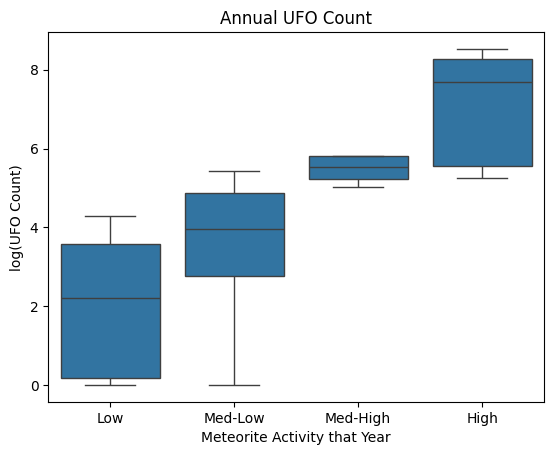

In [ ]:
# plot the distribution of the four groups
fig = sns.boxplot(x='Meteorite_Year_Class_log', y='UFO_count_log', data=meteor_merge_df_sub.dropna(), showfliers=False)
fig.set(title='Annual UFO Count')
fig.set_xlabel('Meteorite Activity that Year')
fig.set_ylabel('log(UFO Count)')

In [ ]:
# perform ordinary least squares regression
model = smf.ols('UFO_count_log ~ Meteorite_Year_Class_log', meteor_merge_df_sub.dropna()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          UFO_count_log   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     33.94
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           2.32e-14
Time:                        18:44:58   Log-Likelihood:                -169.31
No. Observations:                  86   AIC:                             346.6
Df Residuals:                      82   BIC:                             356.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                7.0579      0.378     18.655      0.000       6.305       7.811
Meteorite_Year_Class_log[T.Low]         -4.8788      0.535     -9.118      0.000      -5.943      -3.814
Meteorite_Year_Class_log[T.Med-High]    -1.2988      0.541     -2.399      0.019      -2.376      -0.222
Meteorite_Year_Class_log[T.Med-Low]     -3.6645      0.541     -6.769      0.000      -4.741      -2.587
==============================================================================
Omnibus:                        6.624   Durbin-Watson:                   0.423
Prob(Omnibus):                  0.036   Jarque-Bera (JB):               10.774
Skew:                           0.149   Prob(JB):                      0.00458
Kurtosis:                       4.708   Cond. No.                         4.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our probability F-statistic is much less than the standard alpha level of 0.05, thus we have evidence to reject our null hypothesis in favor of our alternative. We now know there are significant differences between the number of UFO sightings across the four quartiles of (log) total annual meteorites, but which one(s) are different from other ones? We will apply Tukey's Honestly Significant Differences to answer this question. 

In [ ]:
# perform Tukey's HSD
res2 = pairwise_tukeyhsd(meteor_merge_df_sub['UFO_count_log'], meteor_merge_df_sub['Meteorite_Year_Class_log'])
res2.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-4.8788,0.0,-6.3713,-3.3863,True
High,Med-High,-1.2988,0.1259,-2.809,0.2113,False
High,Med-Low,-3.6645,0.0,-5.1746,-2.1543,True
High,nan,0.6496,0.9964,-4.4117,5.7109,False
Low,Med-High,3.58,0.0,2.0699,5.0902,True
Low,Med-Low,1.2144,0.1745,-0.2958,2.7245,False
Low,nan,5.5284,0.0252,0.4671,10.5897,True
Med-High,Med-Low,-2.3657,0.0004,-3.8933,-0.8381,True
Med-High,nan,1.9484,0.82,-3.1181,7.0149,False
Med-Low,nan,4.3141,0.1326,-0.7525,9.3806,False


From the table above, we can see that we reject the null hypothesis that there is no difference between the low and med-high, low and high, med-low and med-high, and med-low and high. In other words, the above test suggests that there is a statistically significant difference between the average number of UFO sightings during the years with relatively low meteorite activity and the years with relatively high meteorite activity. This conclusion supports our prior observation and the astronomer's assumption that an increased number of meteorite landings can be associated with an uptick in UFO sightings.

### Meteorologist Perspective: Weather Patterns/Seasonal Trends vs UFO Sightings

UFO reports can vary in reliability due to the observing conditions (e.g., fog, haze, type of illumination). A meteorologist may argue that reported UFO sightings are results of certain weather phenomenons that are known to skew visual perceptions such as extreme heat, haze and fog. Since humidity and hazy skies are more common among warmer temperatures, one might expect an increase in UFO reports during the steamy summer months compared to the dry, bleak winter. We will investigate the following relationship below, with the null hypothesis being there is not a statistically significant difference between the count of UFO sightings during the summer and winter months and alternative hypothesis being there is a statistically significant difference between the frequency of UFO sightings during the two seasons. 

In [ ]:
# Step 1: Aggregate the data to calculate daily UFO sighting count
ufo_df['datetime'] = pd.to_datetime(ufo_df['datetime'], errors='coerce')
ufo_df['date'] = ufo_df['datetime'].dt.date
daily_counts = ufo_df.groupby('date').size()

In [ ]:
# Step 2: Filter data for winter and summer months
winter_months = [12, 1, 2]
summer_months = [6, 7, 8]

daily_counts_df = daily_counts.reset_index(name='count')
daily_counts_df['month'] = pd.to_datetime(daily_counts_df['date']).dt.month

winter_data = daily_counts_df[daily_counts_df['month'].isin(winter_months)]['count']
summer_data = daily_counts_df[daily_counts_df['month'].isin(summer_months)]['count']

In [ ]:
# Step 3: Perform a 2-sample t-test
t_stat, p_value = stats.ttest_ind(winter_data, summer_data, equal_var=False)
print(f'T-test results -- T-statistic: {t_stat}, P-value: {p_value}')

T-test results -- T-statistic: -4.845554915488723, P-value: 1.2969518997816186e-06


In [ ]:
# Step 4: Calculate confidence intervals
conf_interval_winter = stats.t.interval(0.95, len(winter_data)-1, loc=np.mean(winter_data), scale=stats.sem(winter_data))
conf_interval_summer = stats.t.interval(0.95, len(summer_data)-1, loc=np.mean(summer_data), scale=stats.sem(summer_data))
print(f'Winter confidence interval: {conf_interval_winter}')
print(f'Summer confidence interval: {conf_interval_summer}')

Winter confidence interval: (6.620856895684584, 7.200401238805654)
Summer confidence interval: (7.691873837163239, 8.410185800094677)


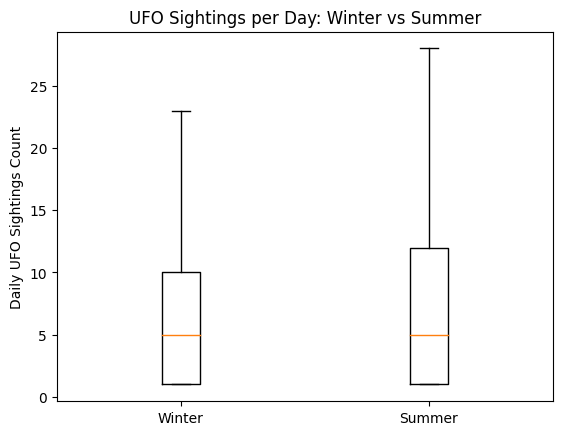

In [ ]:
# Step 5: Generate side-by-side boxplots
plt.boxplot([winter_data, summer_data], labels=['Winter', 'Summer'], showfliers=False)
plt.title('UFO Sightings per Day: Winter vs Summer')
plt.ylabel('Daily UFO Sightings Count')
plt.show()

We can further our analysis by performing an ANOVA test on all four seasons (Winter, Spring, Summer, Fall) for UFO sightings in the US to determine if there is a statistically significant difference in the number of daily UFO sightings across the seasons. Here, the null hypothesis is that the means number of UFO sightings are equal across winter, spring, summer and fall. The alternative hypothesis is that at least one season where the mean number of UFO sightings is different from the others.

In [ ]:
# classify records by season
month_count = merged_df2.groupby(['Month','Year'])['datetime'].count().reset_index(name='UFO_count')
merged_count_df2 = month_count.merge(merged_df2[merged_df2['country'] =='us'], how='inner', on=['Month','Year'])
merged_count_df2.loc[merged_count_df2['Month'].isin([12,1,2]), 'Season'] = 'Winter'
merged_count_df2.loc[merged_count_df2['Month'].isin([3,4,5]), 'Season'] = 'Spring'
merged_count_df2.loc[merged_count_df2['Month'].isin([6,7,8]), 'Season'] = 'Summer'
merged_count_df2.loc[merged_count_df2['Month'].isin([9,10,11]), 'Season'] = 'Fall'
merged_count_df2 = merged_count_df2[['Year', 'UFO_count', 'Month', 'Season']].drop_duplicates()
merged_count_df2['UFO_count_log'] = np.log(merged_count_df2['UFO_count'])

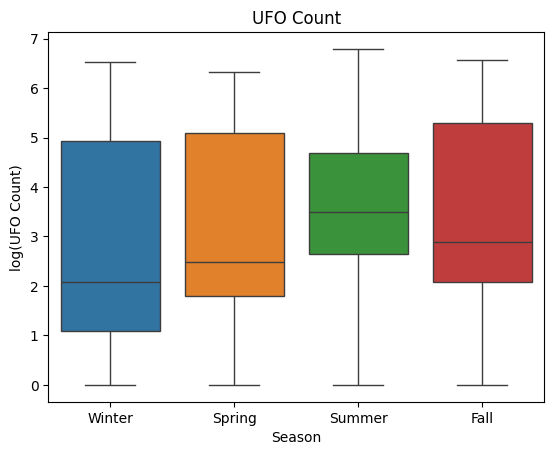

In [ ]:
# plot the distribution of the four groups
fig = sns.boxplot(x='Season', y='UFO_count_log', 
            data=merged_count_df2.sort_values('Month'), 
            showfliers=False, hue='Season')
fig.set(title='UFO Count')
_ = fig.set_ylabel('log(UFO Count)')

In [ ]:
# perform ordinary least squares regression
model = smf.ols('UFO_count_log ~ Season', data=merged_count_df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          UFO_count_log   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     8.327
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           1.87e-05
Time:                        18:45:00   Log-Likelihood:                -1570.6
No. Observations:                 774   AIC:                             3149.
Df Residuals:                     770   BIC:                             3168.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.2745      0.135     24.260      0.000       3.010       3.539
Season[T.Spring]    -0.2104      0.192     -1.093      0.275      -0.588       0.167
Season[T.Summer]     0.2702      0.184      1.469      0.142      -0.091       0.631
Season[T.Winter]    -0.6240      0.191     -3.274      0.001      -0.998      -0.250
==============================================================================
Omnibus:                      120.948   Durbin-Watson:                   0.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.730
Skew:                           0.266   Prob(JB):                     1.06e-08
Kurtosis:                       2.075   Cond. No.                         4.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our probability F-statistic is less than the standard alpha level of 0.05, thus we have evidence to reject our null hypothesis in favor of our alternative. We now know there are significant differences between the number of UFO sightings across the four seasons, but which one(s) are different from other ones? We will apply Tukey's Honestly Significant Differences to answer this question. 

In [ ]:
# perform Tukey's HSD
res2 = pairwise_tukeyhsd(merged_count_df2['UFO_count_log'], merged_count_df2['Season'])
res2.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Fall,Spring,-0.2104,0.6937,-0.7059,0.2851,False
Fall,Summer,0.2702,0.457,-0.2035,0.7439,False
Fall,Winter,-0.624,0.0061,-1.1148,-0.1332,True
Spring,Summer,0.4806,0.0481,0.0028,0.9585,True
Spring,Winter,-0.4136,0.1379,-0.9085,0.0813,False
Summer,Winter,-0.8942,0.0,-1.3672,-0.4213,True


From the table above, we can see that we reject the null hypothesis that there is no difference between the fall and winter, spring and summer and summer and winter means. In other words, the above test suggests that there is a statistically significant difference between the average number of UFO sightings during the summer (June, July, August) and spring (March, April, May), summer and winter (December, January, February) and winter and fall (September, October, November). This conclusion supports our prior observation and the meteorologist's assumption that different weather conditions (specifically an increase in humidity) may be associated with an uptick in UFO sightings. 

### Medical Doctor Perspective: Hallucinogenic Drugs vs UFO Sightings

Hallucinogens are defined as a diverse group of drugs that cause an alteration in perception, thought, or mood. From a medical perspective, it may be reasonable to believe that those who reported UFO sightings were in an altered state, thus one might assume a positive relationship between the prevalence of certain drugs such as hallucinogens and UFO sightings. We will investigate the following relationship below, with the null hypothesis being there is not a statistically significant relationship between hallucinogen use in America and UFO sightings and alternative hypothesis being there is a statistically significant relationship between the two factors (which we may presume to be positive).

In [ ]:
# explore the hallucinogenic drug dataframe
drug_df

,year,annual_use
0,1976,9.5
1,1977,8.9
2,1978,9.7
3,1979,10.0
4,1980,9.4
5,1981,9.1
6,1982,8.2
7,1983,7.3
8,1984,6.6
9,1985,6.4


The above dataset was collected from Monitoring the Future, an ongoing study of the behaviors, attitudes, and values of Americans from adolescence through adulthood, conducted by the University of Michigan. The data collection process involves surveying approximately 50,000 8th, 10th and 12th grade students annually. The specific data we have imported contains the percentage of high school seniors included in the study who claimed to have utilized hallucinogens within the past year from 1976 to 2021.

In [ ]:
# create new dataframe with annual UFO and drug counts
year_count_us = merged_df2[merged_df2['country'] == 'us'].groupby('Year')['datetime'].count().reset_index()
year_count_us.rename(columns={'datetime': 'UFO_count'}, inplace=True)
drug_merge_df = year_count_us.merge(drug_df, how='inner', left_on='Year', right_on='year')
drug_merge_df

,Year,UFO_count,UFO_count_log,year,annual_use
0,1976,222,5.402677,1976,9.5
1,1977,206,5.327876,1977,8.9
2,1978,258,5.552960,1978,9.7
3,1979,191,5.252273,1979,10.0
4,1980,194,5.267858,1980,9.4
5,1981,133,4.890349,1981,9.1
6,1982,134,4.897840,1982,8.2
7,1983,122,4.804021,1983,7.3
8,1984,144,4.969813,1984,6.6
9,1985,171,5.141664,1985,6.4


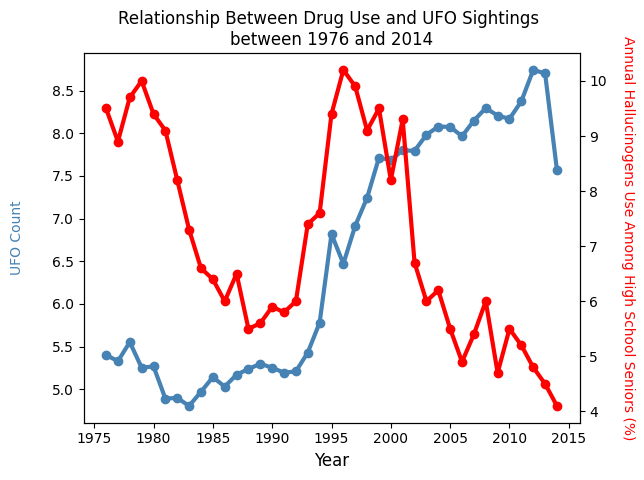

In [ ]:
# plot the trend line corresponding to drug use against the trend line corresponding to UFO count

# define colors to use
col1 = 'steelblue'
col2 = 'red'

# define subplots
fig,ax = plt.subplots()

# add first line to plot
ax.plot(drug_merge_df.year, drug_merge_df.UFO_count, color=col1, marker='o', linewidth=3)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('UFO Count', color=col1, fontsize=10, labelpad=20)

# define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

# add second line to plot
ax2.plot(drug_merge_df.year, drug_merge_df.annual_use, color=col2, marker='o', linewidth=3)
ax2.set_ylabel('Annual Hallucinogens Use Among High School Seniors (%)', color=col2, fontsize=10, rotation=270, labelpad=20)
_ = ax.set_title('Relationship Between Drug Use and UFO Sightings \nbetween 1976 and 2014')

In [ ]:
drug_merge_df[['annual_use','UFO_count']].corr()

,annual_use,UFO_count
annual_use,1.000000,-0.503652
UFO_count,-0.503652,1.000000


Comparing the trend lines between annual drug use and UFO sightings between 1976 and 2014 displayed on the line plot above, there does not appear to be an obvious relationship between the two variables. However, the correlation coefficient suggests that there is a somewhat strong, negative relationship between annual hallucinogenic drug use and UFO sightings over the years. This is unexpected and seemingly contradicts our initial medicine-based theory that assumed the prevalence and popularization of certain drugs such as hallucinogens may correspond to an increase and UFO sightings.

In [ ]:
# perform simple linear regression between total number of UFO sightings and percentage of hallucinogen use among high school seniors
drug_model = smf.ols(f'UFO_count ~ annual_use', data=drug_merge_df).fit()
drug_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              UFO_count   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     12.58
Date:                Tue, 19 Mar 2024   Prob (F-statistic):            0.00108
Time:                        19:36:17   Log-Likelihood:                -340.41
No. Observations:                  39   AIC:                             684.8
Df Residuals:                      37   BIC:                             688.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4959.5907    979.044      5.066      0.000    2975.859    6943.323
annual_use  -474.0399    133.675     -3.546      0.001    -744.891    -203.188
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.373
Prob(Omnibus):                  0.523   Jarque-Bera (JB):                1.232
Skew:                           0.308   Prob(JB):                        0.540
Kurtosis:                       2.385   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our probability F-statistic is less than our standard alpha level of 0.05, thus we have evidence to reject the null hypothesis in favor of the alternative which suggests that there is a statistically significant relationship between the annual use of hallucinogenic drugs among high school seniors and and UFO sightings reported in a year; however, this model counters the medical doctor's argument which assumed this relationship would be positive. Perhaps this unintuitive result is due to the fact that our annual drug use data was collected on a very specific sample (high school seniors) which may not be reflective of our overall population or maybe there is simply no significant relationship between the two features. Despite the statistically significant probability f-statistic, we are not confident in the negative relationship between annual hallucinogenic drug use and UFO count being justified thus we may choose to drop this feature from our predictive model in the furture.

### Anthropologist Perspective: Alien-Related Comic Books vs UFO Sightings

Historically, science fiction has been commonly representative of 1950s paranoia and a genre conducive to expressions of fear. As a result, anthropologists might suggest that the consumption of science fiction or alien-related books can lead to an increased level of paranoia among the general public and assume a positive relationship between the prevalence of alien-related comic books and UFO sightings. We will investigate the following relationship below, with the null hypothesis being there is not a statistically significant relationship between the number of alien-related comic books released during a given year and UFO sightings and alternative hypothesis being there is a statistically significant relationship between the two factors (which we may presume to be positive).

In [ ]:
# explore the total number of alien books realeased per year
scifi_df = merged_df2[['Year', 'Total_Alien_Books']].drop_duplicates().sort_values(by='Year')
scifi_df

,Year,Total_Alien_Books
7825,1906,NaN
10538,1910,NaN
40072,1916,NaN
46467,1920,NaN
20845,1925,NaN
...,...,...
212,2010,36.0
230,2011,63.0
243,2012,75.0
263,2013,100.0


Upon looking at the DataFrame above, we can notice that consistent counts (non-null values) of total alien-related books released during a year do not begin until around 1960, thus we will subselect the years between 1960 to 2014 and drop the years within this range with a null values since we do not have enough information to confidently replace these nulls with values.

In [ ]:
# drop nulls
scifi_df = scifi_df[scifi_df['Year'] >=1960].dropna()

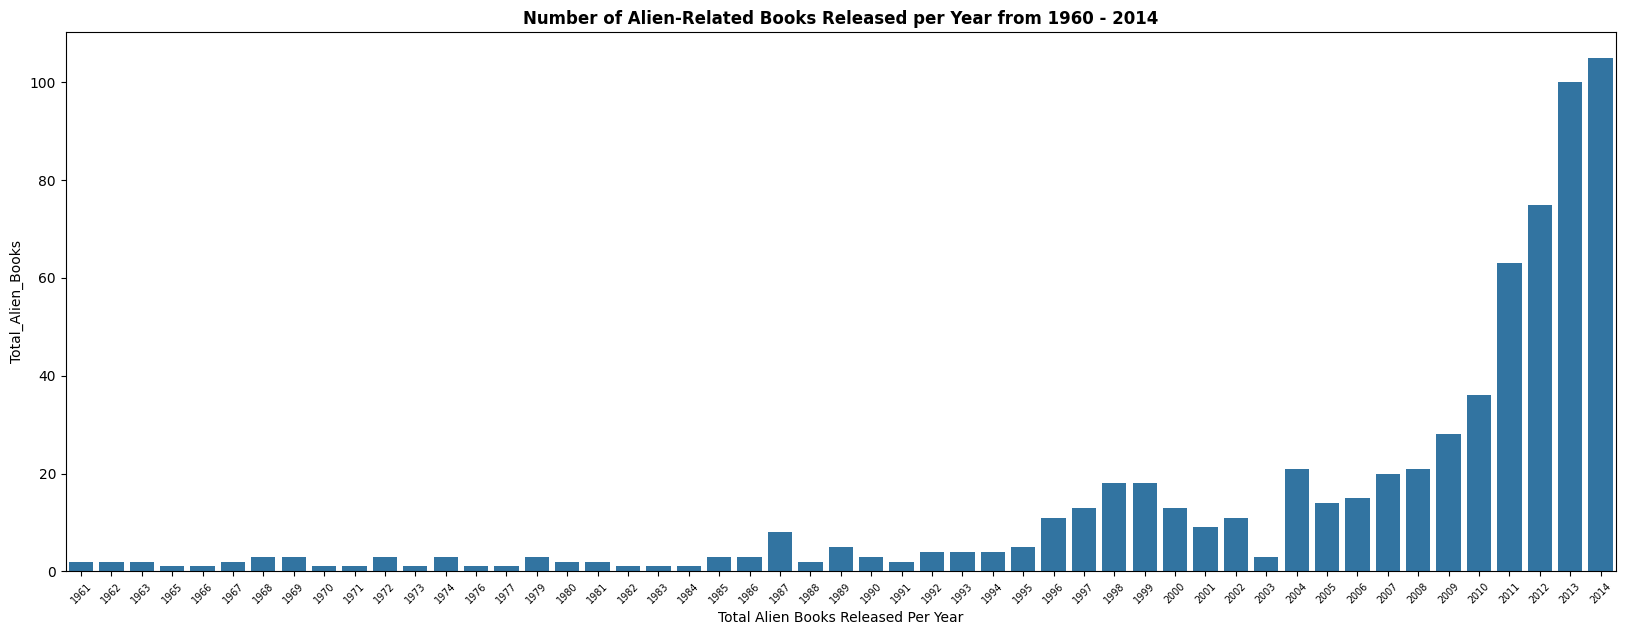

In [ ]:
# plot distribution of alien-related books after 1960
fig = plt.subplots(figsize=(20, 7))
plot = sns.barplot(x='Year', y='Total_Alien_Books', data=scifi_df)
plot.set_xticks(ticks = plot.get_xticks(), labels = plot.get_xticklabels(), rotation=45, fontsize = 'x-small')
plot.set_xlabel('Total Alien Books Released Per Year')
_ = plot.set_title('Number of Alien-Related Books Released per Year After 1960', fontdict = {'size': 12, 'weight':'bold'})

In [ ]:
# create new dataframe with annual UFO and total number of alien-related books
year_count = merged_df2.groupby('Year')['datetime'].count().reset_index()
year_count.rename(columns={'datetime': 'UFO_count'}, inplace=True)
scifi_merge_df = scifi_df.merge(year_count, on='Year')

Text(0.5, 1.0, 'Relationship Between Alien-Related Books Released and UFO Sightings After 1960')

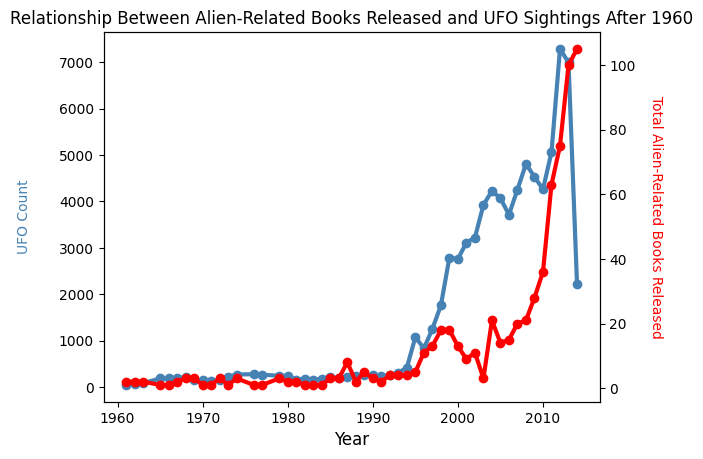

In [ ]:
# plot the trend line corresponding to alien books against the trend line corresponding to UFO count

# define colors to use
col1 = 'steelblue'
col2 = 'red'

# define subplots
fig,ax = plt.subplots()

# add first line to plot
ax.plot(scifi_merge_df.Year, scifi_merge_df.UFO_count, color=col1, marker='o', linewidth=3)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('UFO Count', color=col1, fontsize=10, labelpad=20)

# define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

# add second line to plot
ax2.plot(scifi_merge_df.Year, scifi_merge_df.Total_Alien_Books, color=col2, marker='o', linewidth=3)
ax2.set_ylabel('Total Alien-Related Books Released', color=col2, fontsize=10, rotation=270, labelpad=20)
ax.set_title('Relationship Between Alien-Related Books Released and UFO Sightings After 1960')

In [ ]:
# find correlation between two variables
scifi_merge_df[['Total_Alien_Books','UFO_count']].corr()

,Total_Alien_Books,UFO_count
Total_Alien_Books,1.000000,0.719317
UFO_count,0.719317,1.000000


In [ ]:
# perform simple linear regression between total number of UFO sightings and total alien books released
scifi_model = smf.ols(f'UFO_count ~ Total_Alien_Books', data=scifi_merge_df).fit()
scifi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              UFO_count   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     52.54
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           2.74e-09
Time:                        19:16:09   Log-Likelihood:                -440.75
No. Observations:                  51   AIC:                             885.5
Df Residuals:                      49   BIC:                             889.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           727.0697    225.755      3.221      0.002     273.397    1180.742
Total_Alien_Books    61.5927      8.498      7.248      0.000      44.516      78.669
==============================================================================
Omnibus:                        6.282   Durbin-Watson:                   0.403
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                9.894
Skew:                          -0.024   Prob(JB):                      0.00711
Kurtosis:                       5.157   Cond. No.                         30.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The similar looking trend plots, relatively high positive correlation of approximately 0.72 and small probability F-statistic suggest the there is a statistically significant, positive relationship between the number of alien-related books and UFO sightings reported in a year. The results of conducting this analysis on a smaller subset of our data (determined by when total alien-related book count became more consistent), further corroborates the results of the simple linear regression we performed earlier in our report.

## Multivariable Analysis 

### Multivariable OLS Models

Outlier & High Leverage (Influence Points) Detection Function

In [ ]:
def analyze_regression_model(model):
    # Generate the model's residuals
    residuals = model.resid
    fitted_values = model.fittedvalues
    influence = model.get_influence()
    (c, p) = influence.cooks_distance
    leverage = influence.hat_matrix_diag
    X = model.model.exog  # Getting the design matrix
    
    # Identifying points with high Cook's distance and high leverage points
    high_cooks_distance = np.where(c > 4 / len(X))[0]
    high_leverage_points = np.where(leverage > 2 * np.mean(leverage))[0]
    
    # Identifying the top 10 outliers based on Cook's distance and top 10 high leverage points
    top_10_cooks_indices = np.argsort(c)[-10:]
    top_10_leverage_indices = np.argsort(leverage)[-10:]
    
    # Creating subplots for QQ plot and residual plot
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))
    
    # QQ plot for residuals to check normality
    qqplot(residuals, line='s', alpha=0.5, color='blue', ax=axs[0])
    axs[0].set_title('QQ Plot of Residuals')
    
    # Residual plot
    axs[1].scatter(fitted_values, residuals, alpha=0.5)
    axs[1].axhline(y=0, color='r', linestyle='dashed')
    axs[1].set_title('Residual Plot')
    axs[1].set_xlabel('Fitted values')
    axs[1].set_ylabel('Residuals')
    
    plt.tight_layout()
    
    # Creating subplots for Cook's Distance and leverage values
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))
    
    # Plotting Cook's Distance
    axs[0].stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)
    axs[0].set_title("Cook's Distance")
    axs[0].set_xlabel("Observation")
    axs[0].set_ylabel("Cook's Distance")
    
    # Highlighting top 10 outliers based on Cook's distance
    for point in top_10_cooks_indices:
        axs[0].plot(point, c[point], marker='o', color='r')
    
    # Plotting leverage
    axs[1].stem(np.arange(len(leverage)), leverage, markerfmt=",", use_line_collection=True)
    axs[1].set_title("Leverage Values")
    axs[1].set_xlabel("Observation")
    axs[1].set_ylabel("Leverage")
    
    # Highlighting top 10 high leverage points
    for point in top_10_leverage_indices:
        axs[1].plot(point, leverage[point], marker='o', color='r')
    
    plt.tight_layout()
    plt.show()

In [ ]:
merged_df2['Total_Meteorites'] = pd.to_numeric(merged_df2['Total_Meteorites'], errors='coerce')
merged_df2['duration (seconds)'] = pd.to_numeric(merged_df2['duration (seconds)'], errors='coerce')

Simple Imputation of 'duration (seconds)' and 'Total Meteorites' columns with their means

In [ ]:
# Filling NaN values with the mean
merged_df2['Total_Meteorites'].fillna(merged_df2['Total_Meteorites'].mean(), inplace=True)
merged_df2['duration (seconds)'].fillna(merged_df2['duration (seconds)'].mean(), inplace=True)

Model 1: Predict Duration (in seconds) from 'Total_Meterorites', 'Month', 'Year'

In [ ]:
# Define the formula
formula = 'Q("duration (seconds)") ~ Total_Meteorites + Year + Month'

# Fitting the model using OLS
model = smf.ols(formula=formula, data=merged_df2).fit()

# Print the summary of the model to see the results
print(model.summary())

# Generate the model's residuals
residuals = model.resid

                               OLS Regression Results                              
Dep. Variable:     Q("duration (seconds)")   R-squared:                       0.000
Model:                                 OLS   Adj. R-squared:                  0.000
Method:                      Least Squares   F-statistic:                     3.623
Date:                     Tue, 19 Mar 2024   Prob (F-statistic):             0.0125
Time:                             18:45:05   Log-Likelihood:            -1.1800e+06
No. Observations:                    79951   AIC:                         2.360e+06
Df Residuals:                        79947   BIC:                         2.360e+06
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [ ]:
# Selecting predictor and response variables
X = merged_df2[['Total_Meteorites', 'Year', 'Month']]  # Predictor


y = merged_df2['duration (seconds)']  # Response


# Adding a constant to the predictor (important for intercept)
X = sm.add_constant(X)

# Fitting the model
model = sm.OLS(y, X).fit()

# Generate the model's residuals
residuals = model.resid

/root/venv/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.

/tmp/ipykernel_272/1522999327.py:38: MatplotlibDeprecationWarning:

The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.

/tmp/ipykernel_272/1522999327.py:48: MatplotlibDeprecationWarning:

The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.



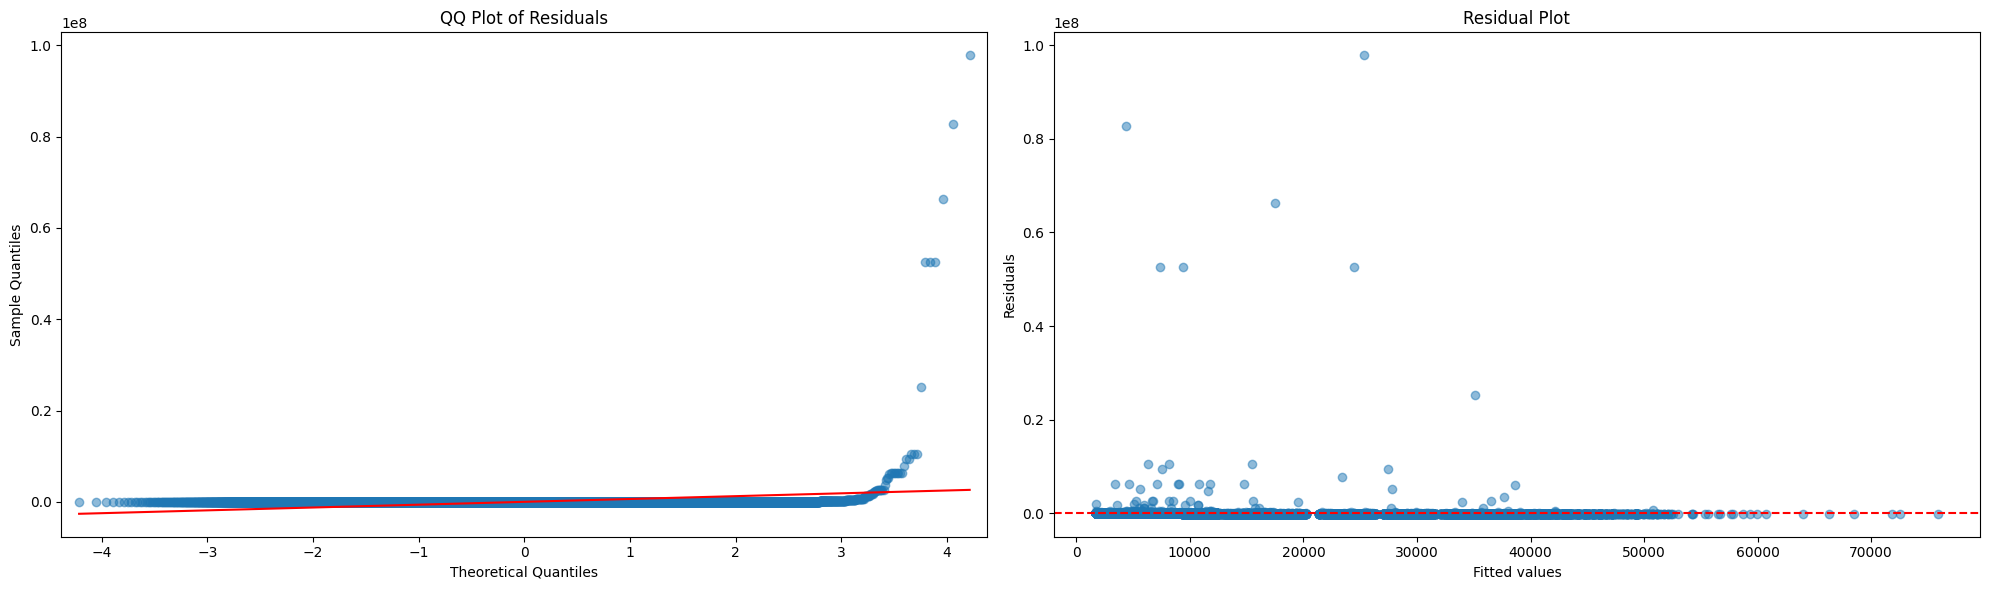

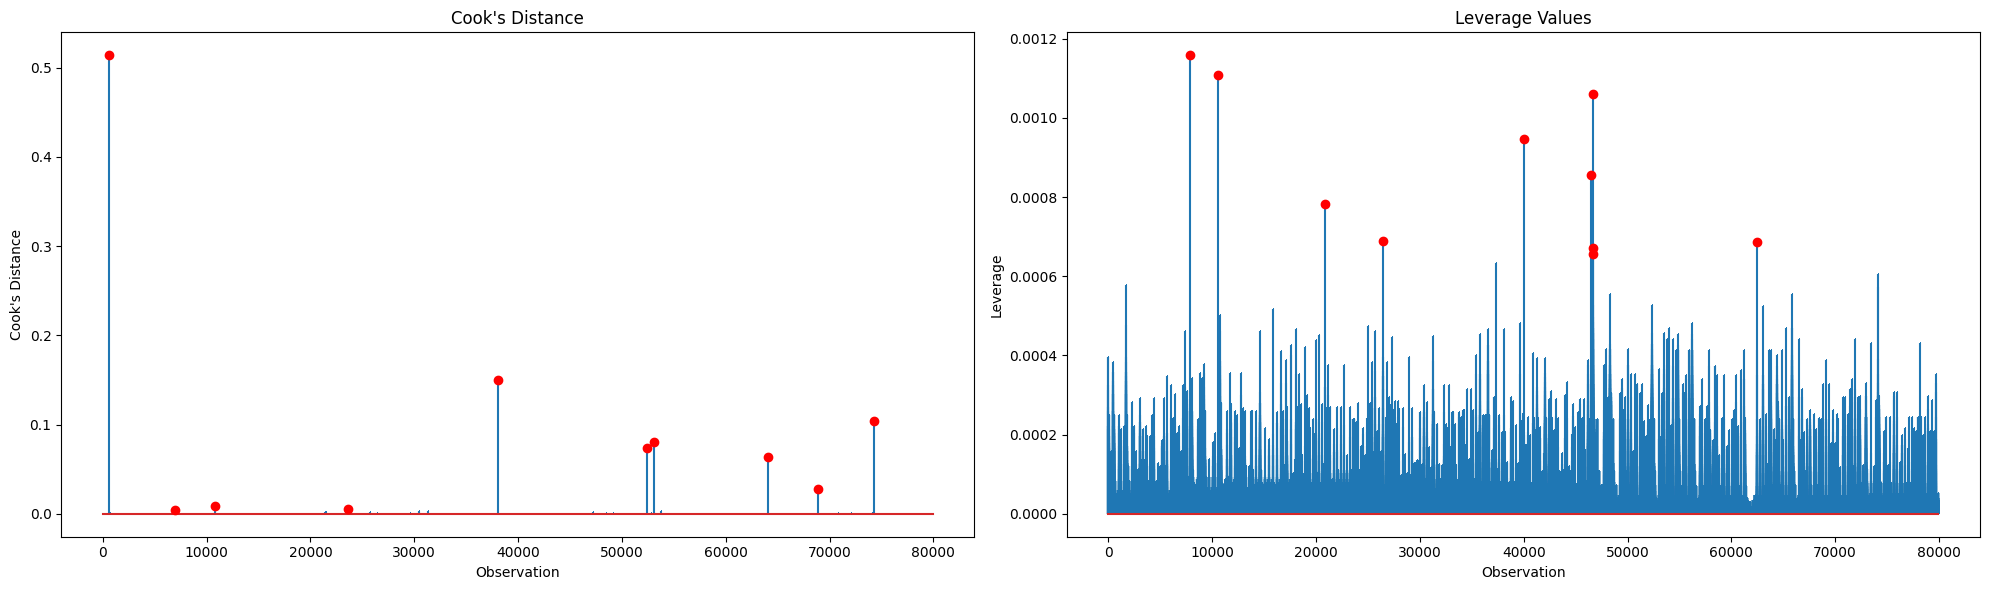

In [ ]:
analyze_regression_model(model)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     duration (seconds)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.623
Date:                Tue, 19 Mar 2024   Prob (F-statistic):             0.0125
Time:                        18:45:17   Log-Likelihood:            -1.1800e+06
No. Observations:               79951   AIC:                         2.360e+06
Df Residuals:                   79947   BIC:                         2.360e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.277e+06   4.22e+05      3.024      0.002    4.49e+05    2.11e+06
Total_Meteorites    -5.1414      3.636     -1.414      0.157     -12.267       1.985
Year              -631.2201    210.699     -2.996      0.003   -1044.189    -218.251
Month              150.7053    680.021      0.222      0.825   -1182.132    1483.542
==============================================================================
Omnibus:                   333606.606   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     767594102268.378
Skew:                         117.442   Prob(JB):                         0.00
Kurtosis:                   15180.753   Cond. No.                     4.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The OLS regression analysis investigating the relationship between UFO sighting durations (duration (seconds)) and predictors such as total meteorite landings, year, and month reveals several key points. Firstly, the extremely low R-squared value of 0.000 indicates that the model explains virtually none of the variability in UFO sighting durations, suggesting that these predictors might not be relevant factors for explaining sighting duration. Despite the significant intercept and the year having a p-value below 0.05, indicating a statistically significant decrease in sighting duration over the years, the effect sizes and practical significance appear minimal given the context and scale of the dependent variable.

The QQ plot's indication of a very long right tail suggests that the duration of UFO sightings is heavily skewed, with a few sightings lasting much longer than most. This skewness might explain why the predictors fail to explain the variance in sighting durations effectively. The presence of only one point with a Cook's distance greater than 0.5 and many high-leverage points further complicates the model's reliability, indicating potential outliers and influential points that could unduly affect the regression's results.

Model 2: Predict Yearly UFO Sightings Count from Yearly Meteorite Count and Yearly Alien Book Count

In [ ]:
ufo_sightings_count_per_year = merged_df2.groupby('Year')['datetime'].count().reset_index(name='UFO_Sightings_Count')

In [ ]:
merged_df2_updated = pd.merge(merged_df2, ufo_sightings_count_per_year, on='Year', how='left')

In [ ]:
merged_df2_updated['UFO_Sightings_Count'].fillna(0, inplace=True)

In [ ]:
formula = 'UFO_Sightings_Count ~ Total_Meteorites + Total_Alien_Books + Year'
model = smf.glm(formula=formula, data=merged_df2_updated, family=sm.families.Poisson()).fit()
print(model.summary())

                  Generalized Linear Model Regression Results                  
Dep. Variable:     UFO_Sightings_Count   No. Observations:                78887
Model:                             GLM   Df Residuals:                    78883
Model Family:                  Poisson   Df Model:                            3
Link Function:                     Log   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:            -8.4052e+06
Date:                 Tue, 19 Mar 2024   Deviance:                   1.6030e+07
Time:                         18:45:18   Pearson chi2:                 1.41e+07
No. Iterations:                     17   Pseudo R-squ. (CS):              1.000
Covariance Type:             nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -177.8138

The Generalized Linear Model (GLM) results for UFO sightings count, modeled as a function of total meteorite landings, total alien-themed book publications, and year, using a Poisson distribution, reveal a highly significant relationship between these variables and the number of UFO sightings. The intercept, set at -177.8138, provides a baseline for the logarithm of expected counts of UFO sightings, indicating the model's starting point before considering the effects of the predictors. The coefficients for Total_Meteorites (-0.0003) and Total_Alien_Books (-0.0062) suggest a negative relationship with UFO sightings, implying that increases in these predictors are associated with a slight decrease in the log-count of UFO sightings. However, the practical significance of these effects is nuanced, given their very small magnitude. Most notably, the Year coefficient (0.0930) indicates a strong positive trend over time, with each passing year associated with an approximate 9.3% increase in the rate of UFO sightings, after accounting for the effects of meteorite landings and alien-themed book publications. 

Model 3: Predict Daily UFO Sightings Count from Month, Average Daily Temperature, and Region

In [ ]:
formula = 'UFO_Sightings_Count ~ Month + AvgTemperature + Region'
model = smf.mixedlm(formula=formula, data=merged_df, groups=merged_df['Region']).fit()
print(model.summary())

                          Mixed Linear Model Regression Results
Model:                    MixedLM         Dependent Variable:         UFO_Sightings_Count
No. Observations:         4471            Method:                     REML               
No. Groups:               7               Scale:                      0.0885             
Min. group size:          4               Log-Likelihood:             -948.9822          
Max. group size:          4208            Converged:                  Yes                
Mean group size:          638.7                                                          
-----------------------------------------------------------------------------------------
                                            Coef.    Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------
Intercept                                    1.239       0.333  3.721 0.000  0.587  1.892
Region[T.Asia]                      

The mixed linear model analysis indicates that the number of UFO sightings (UFO_Sightings_Count) has a statistically significant relationship with the month of the year, with a coefficient of 0.003 (p=0.011), suggesting that as the months progress, there is a slight increase in UFO sightings. However, the average temperature does not significantly influence UFO sightings, as indicated by its coefficient of -0.000 with a p-value of 0.838. Regionally, none of the coefficients for the different regions compared to the baseline (omitted category) are statistically significant, as all p-values are well above the 0.05 threshold, suggesting that within this model's context, the region does not have a significant impact on UFO sightings count. The intercept, representing the expected count of UFO sightings at the baseline level for the omitted region and when other predictors are held at zero, is significant, with a value of 1.239 (p<0.001). This analysis highlights the temporal pattern in UFO sightings while suggesting regional factors and average temperature do not have a significant predictive power on UFO sightings within the model's framework.

### Mediator Relationship

How does public interest in alien-related themes mediate the relationship between meteorite landings and UFO sightings?

Exploring the mediator relationship between meteorite landings, public interest in alien-related themes, and UFO sightings offers valuable insights into how societal factors influence the perception and reporting of unexplained phenomena. It helps unravel the complex interplay between actual extraterrestrial events and cultural trends, providing a deeper understanding of the factors that drive public awareness and interest in UFO sightings. This analysis not only enriches our grasp of the sociocultural dimensions of UFO sightings but also aids in predicting future trends based on observable patterns.

In [ ]:
# Direct effect of Total_Meteorites on UFO_Sightings_Count
model1 = smf.ols('UFO_Sightings_Count ~ Total_Meteorites + Year', data=merged_df2_updated).fit()
print(model1.summary())

                             OLS Regression Results                            
Dep. Variable:     UFO_Sightings_Count   R-squared:                       0.756
Model:                             OLS   Adj. R-squared:                  0.756
Method:                  Least Squares   F-statistic:                 1.236e+05
Date:                 Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                         18:45:19   Log-Likelihood:            -6.6473e+05
No. Observations:                79951   AIC:                         1.329e+06
Df Residuals:                    79948   BIC:                         1.329e+06
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.978e+05   

Model 1 (Direct Effect): This model establishes the direct relationship between meteorite landings and UFO sightings, ignoring potential mediating variables. It's necessary to understand if and how physical evidence of extraterrestrial activity (meteorites) directly influences UFO sighting reports, independent of societal influences.

In [ ]:
# Effect of Total_Meteorites on Total_Alien_Books
model2 = smf.ols('Total_Alien_Books ~ Total_Meteorites + Year', data=merged_df2_updated).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:      Total_Alien_Books   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                 6.836e+04
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:45:19   Log-Likelihood:            -3.4630e+05
No. Observations:               78887   AIC:                         6.926e+05
Df Residuals:                   78884   BIC:                         6.926e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3960.3480     14.666  

Model 2 (Mediator Effect): By focusing on the effect of meteorite landings on the publication of alien-themed books, this model seeks to quantify how societal interest in extraterrestrial themes may be influenced by actual extraterrestrial events. It's crucial for identifying the cultural bridge between scientific phenomena and public awareness or interest.

In [ ]:
# Full model with mediator
model3 = smf.ols('UFO_Sightings_Count ~ Total_Meteorites + Total_Alien_Books + Year', data=merged_df2_updated).fit()
print(model3.summary())

                             OLS Regression Results                            
Dep. Variable:     UFO_Sightings_Count   R-squared:                       0.759
Model:                             OLS   Adj. R-squared:                  0.759
Method:                  Least Squares   F-statistic:                 8.270e+04
Date:                 Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                         18:45:19   Log-Likelihood:            -6.5395e+05
No. Observations:                78887   AIC:                         1.308e+06
Df Residuals:                    78883   BIC:                         1.308e+06
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.922e+05

Model 3 (Full Model): This comprehensive model examines UFO sightings considering both the direct impact of meteorite landings and the indirect impact mediated through public interest (as indicated by alien-themed book publications). It's essential to understand the combined effect of physical extraterrestrial events and societal responses on the reporting of UFO sightings, offering a more nuanced view of the factors driving these reports.

The regression analysis reveals a strong relationship between meteorite landings, public interest in alien-related themes as measured by the publication of alien sci-fi books, and UFO sightings. Initially, the direct model (Model 1) indicated a significant negative relationship between Total_Meteorites and UFO_Sightings_Count, with a high R-squared value of 0.833, suggesting that meteorite landings alone could explain a considerable portion of the variability in UFO sightings. However, the introduction of Total_Alien_Books as a mediator in Model 3 significantly improved the explanatory power of the model, increasing the R-squared to 0.886. This substantial increase underscores the mediating role of public interest in alien themes, with each alien-themed book associated with an increase of approximately 23.6766 UFO sightings, controlling for the year and meteorite landings. The change in coefficient for Total_Meteorites from -1.1337 in the direct model to -0.4717 in the full model with the mediator further supports the mediator's significant role. This analysis highlights the complex interplay between actual extraterrestrial events, cultural trends, and reported UFO sightings, suggesting that societal interest in alien life significantly shapes the frequency and distribution of UFO sighting reports.

## Reflection

Through our analysis, we explored various perspectives and considered alternative ways of explaining the seemingly stochastic event of UFO sightings. In this report, we primarily aggregated UFO reports per year and compared this metric against four features: weather conditions, meteorite landings, prevalence of hallucinogenic drugs and alien-related books. Upon analyzing the marginal distribution of UFO counts per year, we noticed the obvious skew towards more recent years and attempted to account for this using logarithmic transformation. Although there is some controversy in the world of data analytics surrounding the use of log transformations on count data, we believe it was justified since we are not trying to make predictions at this stage but rather attempting to identify levels of relationships between features. Overall, our analysis presented some predictable and some unexpected results. A noteworthy aspect of our dataset is its potential geographical bias, with a possible predominance of data points from the Northern Hemisphere. This imbalance could introduce a bias into our analysis, particularly in understanding temporal patterns and environmental factors affecting UFO sightings globally. The inclination towards Northern Hemisphere data points may skew our seasonal observations and could impact the generalizability of our findings across different latitudes and climates.

 In regards to our four primary features, we concluded that there is a statistically significant, positive relationship between yearly UFO count and annual meteorite landings and between UFO sightings and the total number of alien-related books published during a year. Additionally, we found a statistical difference in the distribution between the average number of UFO sightings that occurred in the winter versus the summer, potentially indicating that more hot and humid conditions may contribute to an increase in UFO reports; however, we also discovered that the average temperature does not significantly influence UFO sightings. Alternatively, we determined that there was a statistically significant, negative relationship between yearly UFO count and annual use of hallucinogenic drugs among high school seniors. This result was unintended since a common symptoms of using hallucinogens is an alteration in perception, thought, or mood; however, upon further research, most hallucinogens do not consistently cause hallucinations, despite their name, thus our initial hypothesis may not have been warranted. Moving forward, we plan to leverage all of this information plus the insights gained from our multivariate analysis to implement a model that could ultimately predict the details of the next UFO sighting.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4a95c9e9-3cb6-41d1-9181-3dc8f009dd81' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>